# Insights to discover about Airbnb in Vienna

## Table of Contents
[Introduction](#introduction)

[Business Understanding](#business_understanding)

[Data Understanding](#data_understanding)

[Data Preparation](#data_preparation)

[Modeling and Evaluation](#modeling_and_evaluation)

[Deployment](#deployment)

[References](#references)

## Introduction <a class='anchor' id='introduction'></a>

<p>Airbnb is a community-based online platform for listing and renting local homes. It connects hosts and travelers and enables the process of renting without owning any rooms itself. Furthermore Airbnb cultivated a sharing economy which allows property owners to rent out private flats. Airbnb was founded in San Francisco in 2008 and became one of the first peer-to-peer services in the world specialized in housing accommodations. Airbnb had a succesful growth since its establishment and counts in 2019 over 1.5 million listings in 34,000 cities of 190 contries [1]. 

<p>In Vienna the first Airbnb listing was registered in 2008. The number of listings increased permanently and counts at the end of 2019 approximately 12,600. On the Inside Airbnb internet page [2] you can find data sets with collected Airbnb data for several cities. There is also a data set available for Airbnb Vienna. As I live in Vienna and I am curious to explore the data set and see if I can find out some interesting insights for potential tourists on the airbnb appartment rental situation in Vienna.

<p>The following analysis is a project of Udacity's Data Science Nanodegree and will be structures according the Cross-Industry Standard Process for Data Mining (CRISP-DM). As tool for the analysis we use the programming language python with its libraries numpy, pandas for data analysis and matplotlib, seaborn for data vizualization.    

## Business Understanding <a class='anchor' id='business_understanding'></a>

<p>As a first step of we need to find out the purpose of our analysis. Therefore we pose following business questions which we will answer with the analysis of the data set:
<ol>
    <li>Where can we find the most listings in Vienna?</li>
    <li>Which type and size have the listings?</li>
    <li>Which are the cheapest and the most expensive districts in Vienna?</li>
    <li>When is the most suitable time to rent an Airbnb appartment in terms of price and availability?</li>
    <li>Is there a significant price difference between weekdays and weekends?</li> 
</ol>

## Data Understanding <a class='anchor' id='data_understanding'></a>

<p>We will be able to answer our business questions by analysing the data sets [3], [4] and [5] which are provided by Inside Airbnb [2]. For Data Understanding we perform following steps with the aim to get an understanding of types and quality of the data:
<ul>
    <li>make setup</li>
    <li>load data</li>
    <li>select data for further analysis</li>
    <li>format data for further analysis</li>
    <li>explore data</li>
</ul>

### Setup

In [1]:
### setup for downloading data set
from pathlib import Path
import requests
from tqdm import tqdm

### setup pandas & numpy
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None) # pandas function for plotting all columns in notebook
pd.plotting.register_matplotlib_converters(explicit=True) # pandas function for plotting of dates
import geopandas as gpd

### import scipy
from scipy import stats 

### setup visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### set default size for plt charts
plt.rc('figure', titlesize=14)
plt.rc('axes', titlesize=12)
plt.rc('axes', labelsize=12)
plt.rc('font', size=10)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('legend', fontsize=10)

### setup for creating base map
import folium
from branca.element import Template, MacroElement

import warnings
warnings.filterwarnings('ignore')

### Load data

In [2]:
### download data from specified url and save on local disk 
date_compiled = '2019-11-19'
url_base_data = f'http://data.insideairbnb.com/austria/vienna/vienna/{date_compiled}/data'
url_base_visualisations = f'http://data.insideairbnb.com/austria/vienna/vienna/{date_compiled}/visualisations'
path_downloads = Path('./vienna_data')

chunk_size = 4096

def download_files(base_url, file_names, data_path):
    """
    Downloads multiple files from specified source by url name and saves to local disk to specified path.
    INPUT:
        base_url - string with base part of url of the data source (without file name) to download
        file_names - list with file names to download
        data_path - string with directory path name for saving downloaded files      
    OUTPUT:
        no value
    """
    data_path.mkdir(parents = True, exist_ok = True)
    
    for file_name in tqdm(file_names):
        file_path = data_path/file_name
    
        if file_path.exists():
            continue

        resp = requests.get(f'{base_url}/{file_name}', stream = True)

        with open(file_path, 'wb') as f:
            for chunk in resp.iter_content(chunk_size = chunk_size):
                f.write(chunk)

data_files = ['listings.csv.gz', 'calendar.csv.gz']
visualisation_files = ['neighbourhoods.geojson']

download_files(url_base_data, data_files, path_downloads)
download_files(url_base_visualisations, visualisation_files, path_downloads)

listings_df = pd.read_csv(path_downloads/'listings.csv.gz')
calendar_df = pd.read_csv(path_downloads/'calendar.csv.gz')
neighbourhoods_gdf = gpd.read_file(path_downloads/'neighbourhoods.geojson')

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.08s/it]


In [3]:
### display first row of each data frame
display(listings_df.head(1), calendar_df.head(1), neighbourhoods_gdf.head(1))

id                         listing_url       scrape_id last_scraped  \
0  15883  https://www.airbnb.com/rooms/15883  20191119235339   2019-11-20   

                        name  \
0  b&b near Old Danube river   

                                             summary  \
0  Four rooms, each one differently and individua...   

                                               space  \
0  Old Danube river, a short walk to one of the s...   

                                         description experiences_offered  \
0  Four rooms, each one differently and individua...                none   

                               neighborhood_overview  \
0  small and personal Four rooms at this B&B, eac...   

                                               notes  \
0  Und sonst? Na ja, und sonst wird spätestens zu...   

                                             transit  \
0  9 minutes to the city The nearest metro statio...   

                                              access  \
0  free wifi, many books about Vienna, great tipp...   

                                         interaction house_rules  \
0  I live here! I am ready for questions any time...         NaN   

   thumbnail_url  medium_url  \
0            NaN         NaN   

                                         picture_url  xl_picture_url  host_id  \
0  https://a0.muscache.com/im/pictures/18eff738-a...             NaN    62142   

                                  host_url host_name  host_since  \
0  https://www.airbnb.com/users/show/62142       Eva  2009-12-11   

           host_location                                         host_about  \
0  Vienna, Wien, Austria  Mein größtes Hobby: Reisen! Am liebsten mit me...   

  host_response_time host_response_rate  host_acceptance_rate  \
0     within an hour                75%                   NaN   

  host_is_superhost                                 host_thumbnail_url  \
0                 f  https://a0.muscache.com/im/users/62142/profile...   

                                    host_picture_url host_neighbourhood  \
0  https://a0.muscache.com/im/users/62142/profile...         Donaustadt   

   host_listings_count  host_total_listings_count  \
0                  6.0                        6.0   

                                  host_verifications host_has_profile_pic  \
0  ['email', 'phone', 'facebook', 'reviews', 'jum...                    t   

  host_identity_verified                   street neighbourhood  \
0                      t  Vienna, Vienna, Austria    Donaustadt   

  neighbourhood_cleansed  neighbourhood_group_cleansed    city   state  \
0             Donaustadt                           NaN  Vienna  Vienna   

  zipcode  market   smart_location country_code  country  latitude  longitude  \
0    1220  Vienna  Vienna, Austria           AT  Austria  48.24144   16.42812   

  is_location_exact      property_type   room_type  accommodates  bathrooms  \
0                 t  Bed and breakfast  Hotel room             3        1.0   

   bedrooms  beds  bed_type  \
0       1.0   1.0  Real Bed   

                                           amenities  square_feet   price  \
0  {TV,Wifi,"Air conditioning",Breakfast,"Free st...          NaN  $85.00   

  weekly_price monthly_price security_deposit cleaning_fee  guests_included  \
0          NaN           NaN              NaN          NaN                2   

  extra_people  minimum_nights  maximum_nights  minimum_minimum_nights  \
0       $10.00               1             365                       1   

   maximum_minimum_nights  minimum_maximum_nights  maximum_maximum_nights  \
0                       3                     999                     999   

   minimum_nights_avg_ntm  maximum_nights_avg_ntm calendar_updated  \
0                     1.0                   999.0        yesterday   

  has_availability  availability_30  availability_60  availability_90  \
0                t               21               37               67   

   availability_365 calend

listing_id        date available    price adjusted_price  minimum_nights  \
0       15883  2019-11-20         f  $106.00        $106.00               1   

   maximum_nights  
0             999

neighbourhood neighbourhood_group  \
0  Leopoldstadt                None   

                                            geometry  
0  MULTIPOLYGON (((16.38484 48.22616, 16.38495 48...

### Select data

#### listings

In [4]:
### listings - select columns
host_cols = ['id']
location_cols = ['neighbourhood', 'zipcode', 'latitude', 'longitude']
property_cols = ['property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 
                 'square_feet']

listings_cols = host_cols + location_cols + property_cols

listings_df = listings_df[listings_cols]

display(listings_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12615 entries, 0 to 12614
Data columns (total 14 columns):
id               12615 non-null int64
neighbourhood    12602 non-null object
zipcode          12407 non-null object
latitude         12615 non-null float64
longitude        12615 non-null float64
property_type    12615 non-null object
room_type        12615 non-null object
accommodates     12615 non-null int64
bathrooms        12606 non-null float64
bedrooms         12600 non-null float64
beds             12593 non-null float64
bed_type         12615 non-null object
amenities        12615 non-null object
square_feet      268 non-null float64
dtypes: float64(6), int64(2), object(6)
memory usage: 1.3+ MB


None

<p><b>listings_df</b> - summary data selection:
<p>skip columns:
<ul>
    <li>columns with host information (without id column)</li>
    <li>all columns with url links</li>
    <li>all columns with textual descriptions of the listings</li>
    <li>all columns with data scraping information</li>
    <li>all columns with price information (we will use price information from calendar_df as this is more up-to-date)</li>
    <li>all columns with availability information</li>
    <li>all columns with review informations</li>
    <li>all columns with verifications and other requirements</li>
</ul>
<p>keep columns:
<ul>
    <li>id</li>
    <li>location information</li>
    <li>property information</li>
</ul>

#### calendar

In [5]:
### calendar - select columns
calendar_cols = ['listing_id', 'date', 'available', 'price', 'adjusted_price']

calendar_df = calendar_df[calendar_cols]

display(calendar_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4604475 entries, 0 to 4604474
Data columns (total 5 columns):
listing_id        int64
date              object
available         object
price             object
adjusted_price    object
dtypes: int64(1), object(4)
memory usage: 175.6+ MB


None

<p><b>calendar_df</b> - summary data selection:
<p>skip columns:
<ul>
    <li>min and max nights</li>
</ul>
<p>keep columns:
<ul>
    <li>listings_id</li>
    <li>date</li>
    <li>available</li>
    <li>price and adjusted price</li>
</ul>

#### neighbourhoods

In [6]:
### neighbourhood gdf - select columns
gdf_cols = ['neighbourhood', 'geometry']

neighbourhoods_gdf = neighbourhoods_gdf[gdf_cols]

display(neighbourhoods_gdf.info())

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
neighbourhood    23 non-null object
geometry         23 non-null geometry
dtypes: geometry(1), object(1)
memory usage: 496.0+ bytes


None

<p><b>neighbourhoods_gdf</b> - summary data selection:
<p>skip columns:
<ul>
    <li>neighbourhood_group</li>
</ul>
<p>keep columns:
<ul>
    <li>neighbourhood</li>
    <li>geometry</li>
</ul>

### Format data

In [7]:
def convert_dtype(df, cols_dt, cols_perc, cols_bool, cols_cur):
    """
    Transformes dtypes of columns to datetime, percentage, boolian and currency 
    INPUT:
        df - dataframe with selected data
        cols_dt - list with columns to be converted from object to datatime
        cols_perc - list with columns to be converted from object to proportion
        cols_bool - list with columns to be converted from object to integer (1 and 0)
        cols_cur - list with columns to be converted from object to datatime      
    OUTPUT:
        dataframe with converted dtypes from cols_dt, cols_perc, cols_bool and cols_cur
    """
    ### convert dtype from object to datetime
    for col in cols_dt:
        df[col] = pd.to_datetime(df[col])
        
    ### convert dtype from object to proportions (float)
    for col in cols_perc:
        df[col] = df[col].str.replace('%','')
        df[col] = df[col].str.replace(',', '').astype(float)
        df[col] = df[col] * 0.01
    
    ### convert dtype from object to integer (0 and 1)
    for col in cols_bool:
        df[col] = df[col].apply(lambda x: 1 if x == 't' else 0)
        
    ### convert price & adjusted price dtype from object to float (without $)
    for col in cols_cur:
        df[col] = df[col].str.replace('$','')
        df[col] = df[col].str.replace(',', '').astype(float)

#### calendar

In [8]:
### calendar - formatting columns
cols_dt = ['date']
cols_perc = []
cols_bool = ['available']
cols_cur = ['price', 'adjusted_price']

convert_dtype(calendar_df, cols_dt, cols_perc, cols_bool, cols_cur)

display(calendar_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4604475 entries, 0 to 4604474
Data columns (total 5 columns):
listing_id        int64
date              datetime64[ns]
available         int64
price             float64
adjusted_price    float64
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 175.6 MB


None

#### neighbourhoods

In [9]:
### neighbourhood_gdf - correcting neighbourhood spelling
neighbourhoods_gdf['neighbourhood'] = neighbourhoods_gdf['neighbourhood'].str.replace('Landstra§e', 'Landstraße')
neighbourhoods_gdf['neighbourhood'] = neighbourhoods_gdf['neighbourhood'].str.replace('Rudolfsheim-Fnfhaus', 'Rudolfsheim-Fünfhaus')
neighbourhoods_gdf['neighbourhood'] = neighbourhoods_gdf['neighbourhood'].str.replace('Dbling', 'Döbling')
neighbourhoods_gdf['neighbourhood'] = neighbourhoods_gdf['neighbourhood'].str.replace('Whring', 'Währing')

### Explore data

#### listings

In [10]:
### display column statistics with describe() function
display(listings_df.describe(include='all'))

id neighbourhood zipcode      latitude     longitude  \
count   1.261500e+04         12602   12407  12615.000000  12615.000000   
unique           NaN            23      31           NaN           NaN   
top              NaN  Leopoldstadt    1020           NaN           NaN   
freq             NaN          1332    1312           NaN           NaN   
mean    2.242882e+07           NaN     NaN     48.206025     16.360967   
std     1.185490e+07           NaN     NaN      0.019686      0.034478   
min     1.588300e+04           NaN     NaN     48.125850     16.194540   
25%     1.342930e+07           NaN     NaN     48.192340     16.340290   
50%     2.296397e+07           NaN     NaN     48.205380     16.358110   
75%     3.298837e+07           NaN     NaN     48.219020     16.380050   
max     4.023351e+07           NaN     NaN     48.298570     16.546790   

       property_type        room_type  accommodates     bathrooms  \
count          12615            12615  12615.000000  12606.000000   
unique            27                4           NaN           NaN   
top        Apartment  Entire home/apt           NaN           NaN   
freq           11021             9193           NaN           NaN   
mean             NaN              NaN      3.416964      1.173489   
std              NaN              NaN      1.916581      0.423204   
min              NaN              NaN      1.000000      0.000000   
25%              NaN              NaN      2.000000      1.000000   
50%              NaN              NaN      3.000000      1.000000   
75%              NaN              NaN      4.000000      1.000000   
max              NaN              NaN     16.000000     11.000000   

            bedrooms          beds  bed_type amenities  square_feet  
count   12600.000000  12593.000000     12615     12615   268.000000  
unique           NaN           NaN         5     11653          NaN  
top              NaN           NaN  Real Bed        {}          NaN  
freq             NaN           NaN     12428        22          NaN  
mean        1.210000      1.937346       NaN       NaN   465.645522  
std         0.798957      1.473548       NaN       NaN   354.067628  
min         0.000000      0.000000       NaN       NaN     0.000000  
25%         1.000000      1.000000       NaN       NaN   160.750000  
50%         1.000000      2.000000       NaN       NaN   457.500000  
75%         1.000000      2.000000       NaN       NaN   689.000000  
max        18.000000     30.000000       NaN       NaN  2099.000000

In [11]:
### display proportion of missing data for all selected columns
display(listings_df.isnull().mean())

id               0.000000
neighbourhood    0.001031
zipcode          0.016488
latitude         0.000000
longitude        0.000000
property_type    0.000000
room_type        0.000000
accommodates     0.000000
bathrooms        0.000713
bedrooms         0.001189
beds             0.001744
bed_type         0.000000
amenities        0.000000
square_feet      0.978755
dtype: float64

<p>There are some missing values in several columns of listings_df:
<ul>
    <li><b>neighbourhood: </b> has appr. 0.1 % missing values.</li>
    <li><b>zipcode: </b> has appr. has 1.6 % missing values. We will drop the whole column as we need only the information from the neighbourhood column.</li>
    <li><b>bathrooms, bedrooms, beds: </b> has less than 0.2 % missing values.</li>
        <li><b>square_feet: </b> has appr. has 98 % missing values. We will drop the whole column as we have to little values for imputation of data.</li>
</ul>

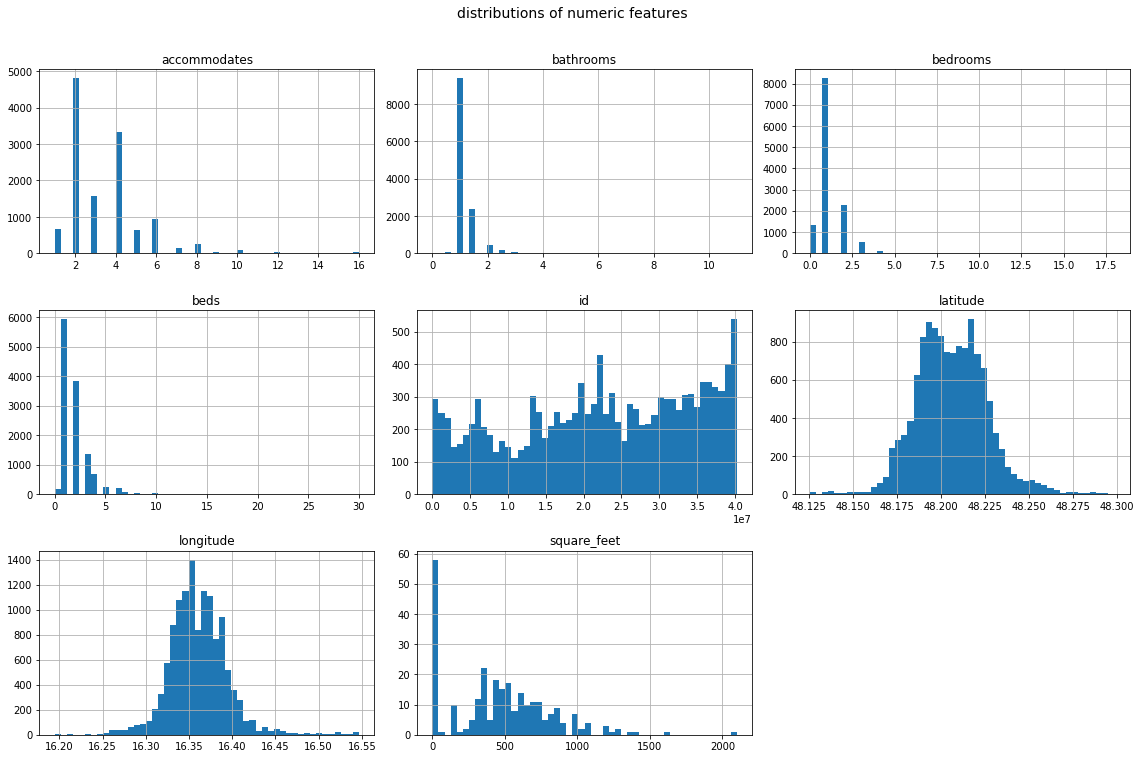

In [12]:
### display histograms for all columns with numerical data
listings_df.select_dtypes(include=np.number).hist(figsize = (16, 10), bins=50, log = False)
plt.suptitle('distributions of numeric features', y=1.05)
plt.tight_layout()

examine categorical features

neighbourhood  nr_listings  proportion [%]
11          Leopoldstadt         1332       10.569751
10            Landstraße         1135        9.006507
0             Alsergrund          848        6.729091
19  Rudolfsheim-Fünfhaus          838        6.649738
13            Margareten          791        6.276781

property_type  nr_listings  proportion [%]
1            Apartment        11021       87.364249
9          Condominium          453        3.590963
21  Serviced apartment          421        3.337297
18               House          237        1.878716
19                Loft          219        1.736029

room_type  nr_listings  proportion [%]
0  Entire home/apt         9193       72.873563
2     Private room         3148       24.954419
1       Hotel room          179        1.418946
3      Shared room           95        0.753072

bed_type  nr_listings  proportion [%]
4       Real Bed        12428       98.517638
3  Pull-out Sofa          129        1.022592
2          Futon           27        0.214031
1          Couch           26        0.206104
0         Airbed            5        0.039635

None None None None


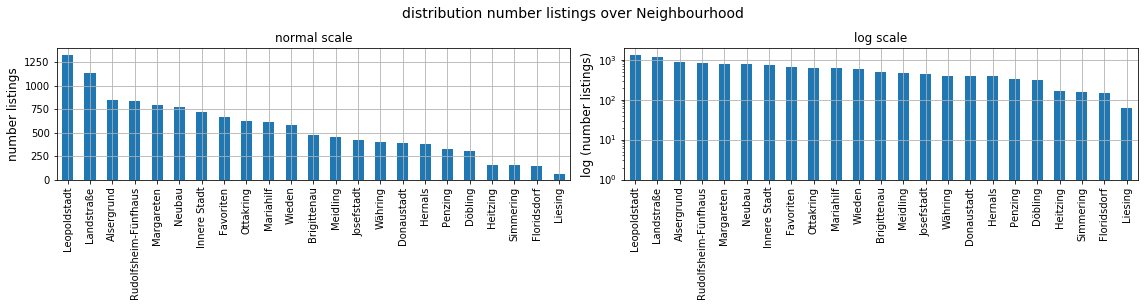

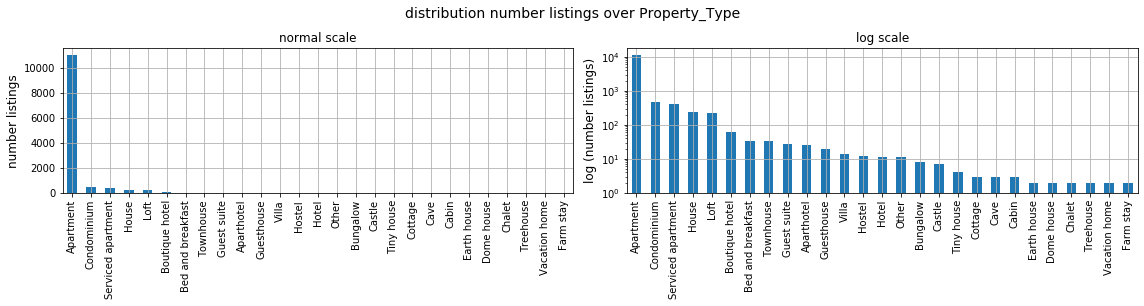

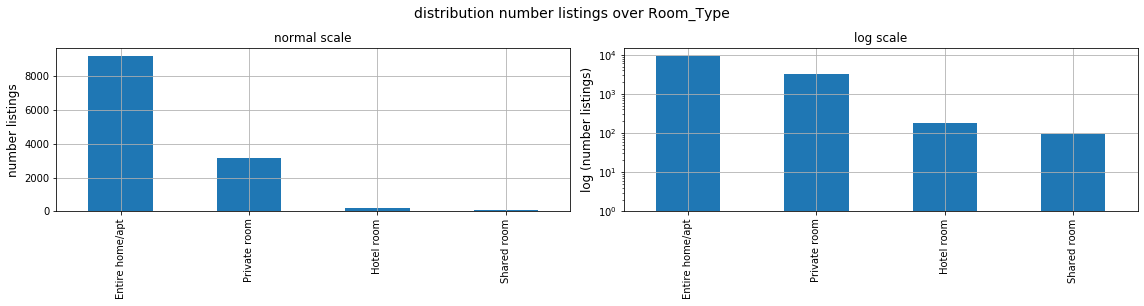

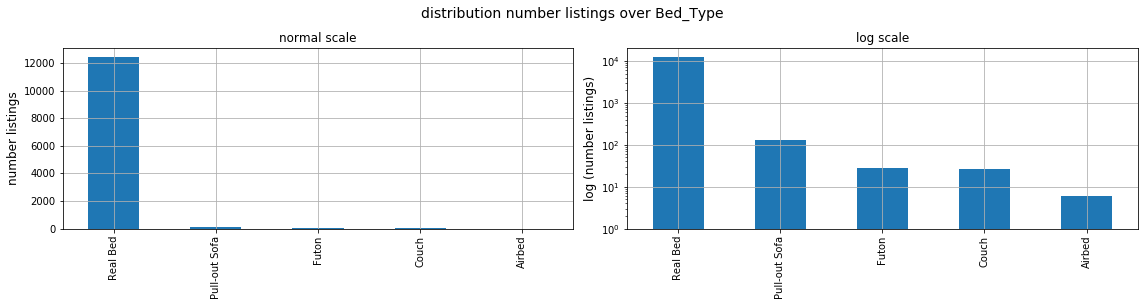

In [13]:
def plot_categoric_bar(df, col):
    """
    Aggregates and sorts categorical data of one independent variable and plots bar chart with normal and log scale 
    INPUT:
        df - dataframe with selected data
        cols - column with independent variable to be aggregated and sorted     
    OUTPUT:
        2 bar charts: left bar chart shows independent variable with normal scale count and 
        right bar chart shows independent variable with logaritmic scale count
    """
    agg = df.groupby(col).agg(nr_listings = ('id', 'count')).reset_index()\
                         .sort_values('nr_listings', ascending = False)
    fig, ax = plt.subplots(1, 2, figsize=(16, 4))

    agg.plot(x = col, y = 'nr_listings', kind = 'bar', ax = ax[0], legend = False, grid = True, log = False)
    ax[0].set_title('normal scale')
    ax[0].set_ylabel('number listings')
    ax[0].set_xlabel('')

    agg.plot(x = col, y = 'nr_listings', kind = 'bar', ax = ax[1], legend = False, grid = True, log = True)
    ax[1].set_title('log scale')
    ax[1].set_ylabel('log (number listings)')
    ax[1].set_xlabel('')
    
    fig.suptitle(('distribution number listings over ' + col.title()), y = 1.05)
    fig.tight_layout()
    
    agg['proportion [%]'] = 100 * agg['nr_listings'] / agg['nr_listings'].sum()
    display(agg.head(5))

### display bar charts for all columns with categorical data in normal and  logarithmic scale
print(plot_categoric_bar(listings_df, 'neighbourhood'),
       plot_categoric_bar(listings_df, 'property_type'),
       plot_categoric_bar(listings_df, 'room_type'),
       plot_categoric_bar(listings_df, 'bed_type'))

#### calendar

In [14]:
### display column statistics with describe() function
display(calendar_df.describe(include='all'))

listing_id                 date     available         price  \
count   4.604475e+06              4604475  4.604475e+06  4.604299e+06   
unique           NaN                  365           NaN           NaN   
top              NaN  2020-04-20 00:00:00           NaN           NaN   
freq             NaN                12615           NaN           NaN   
first            NaN  2019-11-20 00:00:00           NaN           NaN   
last             NaN  2020-11-18 00:00:00           NaN           NaN   
mean    2.242882e+07                  NaN  3.613309e-01  8.444271e+01   
std     1.185443e+07                  NaN  4.803862e-01  1.986505e+02   
min     1.588300e+04                  NaN  0.000000e+00  9.000000e+00   
25%     1.342827e+07                  NaN  0.000000e+00  4.000000e+01   
50%     2.296397e+07                  NaN  0.000000e+00  6.000000e+01   
75%     3.298869e+07                  NaN  1.000000e+00  9.000000e+01   
max     4.023351e+07                  NaN  1.000000e+00  1.291200e+04   

        adjusted_price  
count     4.604299e+06  
unique             NaN  
top                NaN  
freq               NaN  
first              NaN  
last               NaN  
mean      8.442978e+01  
std       1.988252e+02  
min       9.000000e+00  
25%       4.000000e+01  
50%       6.000000e+01  
75%       9.000000e+01  
max       1.291200e+04

In [15]:
### display proportion of missing data for all selected columns
display(calendar_df.isnull().mean())

listing_id        0.000000
date              0.000000
available         0.000000
price             0.000038
adjusted_price    0.000038
dtype: float64

<p>There are few missing values in price columns of calendar_df:
<ul>
    <li><b>price: </b> has appr. 0.004 % missing values. We will drop the whole column as we will continue computation with the adjusted_price column.</li>
    <li><b>adjusted_price: </b> has appr. 0.004 % missing values. We will drop the rows with the missing values.</li>
</ul>

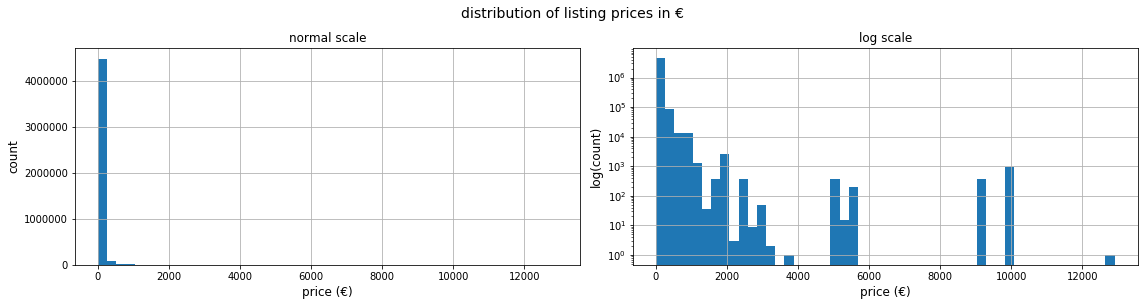

In [16]:
### display histograms for adjusted price column in normal and logarithmic scale
fig, ax = plt.subplots(1, 2, figsize=(16, 4))
    
calendar_df['adjusted_price'].hist(bins=50, ax=ax[0], grid= True, log = False)
ax[0].set_title('normal scale')
ax[0].set_ylabel('count')
ax[0].set_xlabel('price (€)')

calendar_df['adjusted_price'].hist(bins=50, ax=ax[1], grid= True, log = True)
ax[1].set_title('log scale')
ax[1].set_ylabel('log(count)')
ax[1].set_xlabel('price (€)')

fig.suptitle('distribution of listing prices in €', y = 1.05)
fig.tight_layout()

<p>The distribution of the listing prices have a few very high prices. In chapter Data Preparation we will check whether these high prices are plausible or outliers which have to be dropped. 

#### neighbourhoods gdf

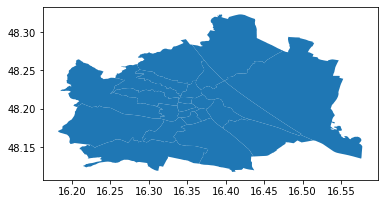

In [17]:
### plot neighbourhoods gdf
display(neighbourhoods_gdf.plot())

### Summary Data Understanding

<p><b>listings_df</b>
<ul>
    <li>12615 samples with 14 variables</li>
    <li>many missing values for variable square_feet (appr. 98 %)</li>
    <li>missing values for variable zipcode (appr. 1.6 %)</li>
    <li>few missing values for variables neighbourhood, bathroom, bedrooms and beds (less than 0.2 %)</li>
    <li>all numerical variables describing the property are right skewed with outlier values</li>
</ul>

<p><b>calendar_df</b>
<ul>
    <li>4604475 samples with 5 variables</li>
    <li>very few missing values for variables price and adjusted price (less than 0.004 %)</li>
    <li>price variables are right skewed with outlier values</li>
</ul>

## Data Preparation <a class='anchor' id='data_preparation'></a>

<p>After getting to know types and quality of the data we prepare in the next step the data for our analysis. For Data Preparation we perform following steps: 

<ul>
    <li>clean data</li>
    <li>engineering data</li>
</ul>

<p>Before starting the cleaning process let's save a copy of each data set in case we mess up with the cleaning process.

In [18]:
listings_raw = listings_df.copy()
calendar_raw = calendar_df.copy()
neighbourhoods_gdf_raw = neighbourhoods_gdf.copy()

#listings_df = listings_raw
#calendar_df = calendar_raw
#neighbourhoods_gdf = neighbourhoods_gdf_raw

### Clean data

#### calendar

<p>First we perform data cleaning on calendar_df with the following steps:
<ul>
    <li>drop listings which are never available for the entire existing interval</li>
    <li>drop price column and keep price_adjusted column</li>
    <li>drop rows of price_adjusted column with missing numerical values</li>
    <li>drop outliers at data engineering (very expensive listings above 2500 €/night)</li>
</ul>

In [19]:
### drop column with price, as we will continue analyisis with price_adjusted column:
calendar_df = calendar_df.drop(columns = ['price'])

### drop rows with missing values (< 0.004 % of total data)
calendar_df = calendar_df.dropna(subset= ['adjusted_price'], axis=0, how= 'any')

In [20]:
### prepare df and aggregate all listings to one listing_id
listing_availability = calendar_df.groupby(['listing_id']).agg(total_available = ('available', 'sum')).reset_index()

### prepare array with all listing_id which are never available 
listing_never_available = listing_availability[listing_availability['total_available'] == 0]['listing_id'].values

### calculate proportion of listings which are never available
print (f'listings never available: {len(listing_never_available)} (of total {len(listing_availability)})\n'
       f'proportion listings never available:\
       {100.0 * len(listing_never_available) / (len(listing_availability)):.2f} %')

listings never available: 3348 (of total 12615)
proportion listings never available:       26.54 %


In [21]:
### drop listings which are never available (available = 0) from calendar df
calendar_df = calendar_df[~calendar_df['listing_id'].isin(listing_never_available)]
print (f'number daily prices in cleaned calendar_df: {len(calendar_df)}\n'
       f'number listings in cleaned calendar_df: {calendar_df.listing_id.nunique()}\n')
 
display(calendar_df.info())

number daily prices in cleaned calendar_df: 3382455
number listings in cleaned calendar_df: 9267

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3382455 entries, 0 to 4604474
Data columns (total 4 columns):
listing_id        int64
date              datetime64[ns]
available         int64
adjusted_price    float64
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 129.0 MB


None

<p>We drop listings which are never available (appr. 26.5 % of total listings) because we want to perform our analysis only on the listings which are offered to the market. The cleaned calendar_df contains 3382455 daily prices of 9267 unique listings.

#### listings

<p>Now we perform data cleaning on listings_df with the following steps:
<ul>
    <li>drop listing ids which are never available and which were already dropped in calendar_df</li>
    <li>drop columns zipcode, square feet and ammenities</li>
</ul>

In [22]:
### prepare dataframe including only listings with mean availablility > 0 and calculate mean price per listing_id. 
price_avg = calendar_df.groupby('listing_id').adjusted_price.mean().reset_index()\
                             .rename(columns={'listing_id': 'id', 'adjusted_price': 'price_avg'})

In [23]:
### Merge average listing prices from price_avg dataframe to listings_df (execute only 1 time !!!)
listings_df = price_avg.merge(listings_df, on = 'id')

In [24]:
### drop not needed columns:
listings_df = listings_df.drop(columns = ['zipcode', 'amenities','square_feet'])

### drop rows with missing values (< 0.2 % of total data)
#listings_df = listings_df.dropna(subset= ['neighbourhood', 'bathrooms', 'bedrooms', 'beds'], axis=0, how= 'any')

### display column information with info() function
display (listings_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9267 entries, 0 to 9266
Data columns (total 12 columns):
id               9267 non-null int64
price_avg        9267 non-null float64
neighbourhood    9254 non-null object
latitude         9267 non-null float64
longitude        9267 non-null float64
property_type    9267 non-null object
room_type        9267 non-null object
accommodates     9267 non-null int64
bathrooms        9258 non-null float64
bedrooms         9257 non-null float64
beds             9246 non-null float64
bed_type         9267 non-null object
dtypes: float64(6), int64(2), object(4)
memory usage: 941.2+ KB


None

### Engineering data

<p>Here we generate features which are necessary for our analysis and modeling. Furthermore we try to identify and drop outliers from the data set.

<p>Below we prepare a summary statistic of prices in the cleaned calendar_df grouped by listing_id and containing: days available, price_median, price_mean, price_min and price_max price per listing_id. Then we add a column with price range in percents (<i>100 % * (max-min)/mean</i>) for each listing_id as an indicator of the price variation.

In [25]:
### #### listings with aggregated price statistic per listing_id (count, median, mean, min, max) 
price_stats = calendar_df.groupby('listing_id').agg(days_available = ('adjusted_price', 'count'),
                            price_median = ('adjusted_price', 'median'), price_mean = ('adjusted_price', 'mean'),
                            price_min = ('adjusted_price', 'min'), price_max = ('adjusted_price', 'max')).reset_index()

### calulate price percent range of all prices of one listing_id ((max - min) / mean * 100)
price_stats['price_range'] = ((price_stats['price_max'] - price_stats['price_min']) / price_stats['price_mean']) * 100

### display sample of created dataframe
display(price_stats.sample(5, random_state = 42))

listing_id  days_available  price_median  price_mean  price_min  \
7473    36087423             365          21.0   19.586301       17.0   
2729    16892220             365          41.0   41.000000       41.0   
2453    15671001             365          95.0   95.000000       95.0   
8720    39410788             365          39.0   39.010959       39.0   
5026    27253462             365          92.0   97.054795       75.0   

      price_max  price_range  
7473       22.0    25.528046  
2729       41.0     0.000000  
2453       95.0     0.000000  
8720       41.0     5.126765  
5026      180.0   108.186309

<p>Before looking for outliers, let's take a look on the distribution of percent ranges of all listings to check if a high price vaiation is the norm or just coincidence.

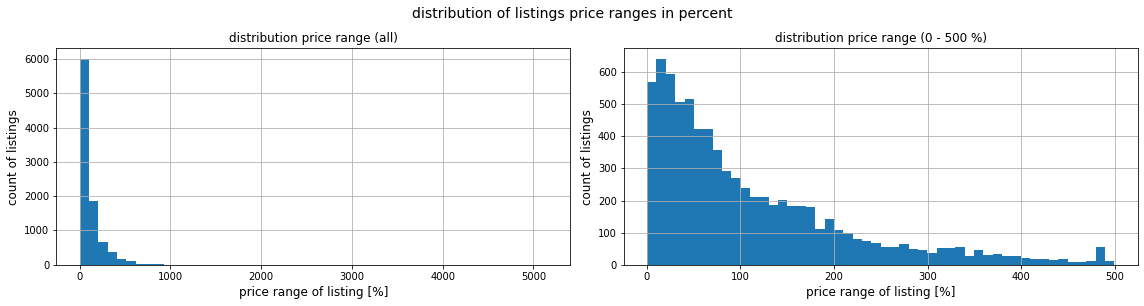

In [26]:
### display histograms with price range distributions (one with all data and one with data in range 0 - 500 %)
fig, ax = plt.subplots(1, 2, figsize=(16, 4))
    
price_stats['price_range'].hist(bins=50, ax=ax[0], grid= True, log = False)
ax[0].set_title('distribution price range (all)')
ax[0].set_ylabel('count of listings')
ax[0].set_xlabel('price range of listing [%]')

price_stats['price_range'][(price_stats['price_range'] < 500) & (price_stats['price_range'] > 0)]\
                            .hist(bins=50, ax=ax[1], grid= True, log = False)
ax[1].set_title('distribution price range (0 - 500 %)')
ax[1].set_ylabel('count of listings')
ax[1].set_xlabel('price range of listing [%]')

fig.suptitle('distribution of listings price ranges in percent', y = 1.05)
fig.tight_layout()

In [27]:
### calculate proportion of listings with fixed price throughout the year
listings_price_constant = 100 * (price_stats['price_range'] == 0).mean()

### calculate median price range of all price ranges (excluding fixed price listings throughout the year)
listings_price_var_median = price_stats[price_stats['price_range'] > 0].price_range.median()

### calculate mean price range of all price ranges (excluding fixed price listings throughout the year)
listings_price_var_mean = price_stats[price_stats['price_range'] > 0].price_range.mean()

print (f'proportion listings with constant price: {(listings_price_constant):.2f} % \n'
       f'median price range: {(listings_price_var_median):.2f} % \n'
       f'mean price range: {(listings_price_var_mean):.2f} %')

proportion listings with constant price: 14.47 % 
median price range: 78.13 % 
mean price range: 126.84 %


<p>Appr. 14.5 % of the listings have a fixed price througout the year. The median price percent range of the listings which have variable prices is 78.13 % and the mean is with 126.84 % even higher which indicates that we have a positively skewed distribution with outliers on the high price part.

<p>In the following we plot a histogram of listing median prices and mark outlier threshold prices using interquartile range (IQR). We will use the method of Tukey's fences to identify outliers outside 1,5 * IQR and far outlier values using 3 * IQR fence [6].

In [28]:
def iqr_outlier_fence(series, k):
    """
    Calculates lower and upper outlier fence of a distribution in form of a data series
    INPUT:
        series - seriens with selected df column
        k - interquantile box length multiplier (standard Tukey is k = 1,5)   
    OUTPUT:
        return lower and upper outlier fence of k * IQR
    """
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    return (q3 + k * iqr, q3 + k * iqr)

In [29]:
### calculate upper outlier (k = 1.5 and k = 3) fence of median prices 
_, outlier_iqr1_5 = iqr_outlier_fence(price_stats['price_median'], 1.5)
_, outlier_iqr3 = iqr_outlier_fence(price_stats['price_median'], 3)

print(f'1.5 iqr upper_fence: {(outlier_iqr1_5):.2f} € \n'
      f'3.0 iqr upper_fence: {(outlier_iqr3):.2f} €')

1.5 iqr upper_fence: 170.50 € 
3.0 iqr upper_fence: 244.00 €


<p>The 1.5 IQR top fence is at 170.5 € per night and appartment. Now let's vizualise the outlier fences in the median listing price distribution:

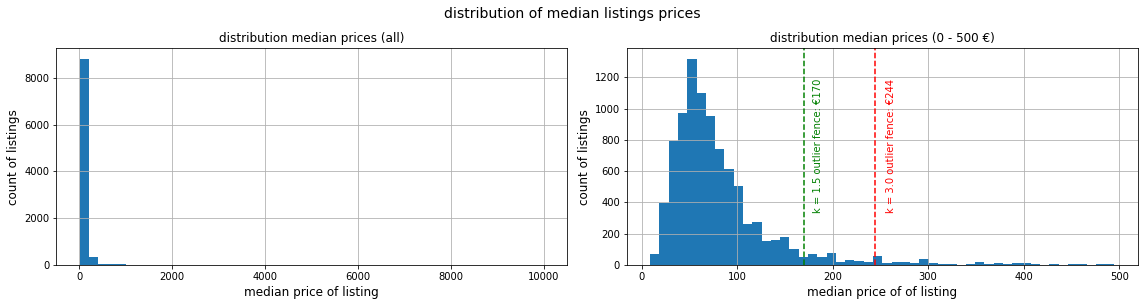

In [30]:
### display histograms with price range distributions (one with all data and one with data in range 0 - 500 %)
### including 1.5 iqr and 3 iqr top fence 
fig, ax = plt.subplots(1, 2, figsize=(16, 4))
    
price_stats['price_median'].hist(bins=50, ax=ax[0], grid= True, log = False)
ax[0].set_title('distribution median prices (all)')
ax[0].set_ylabel('count of listings')
ax[0].set_xlabel('median price of listing')

price_stats['price_median'][(price_stats['price_median'] < 500) & (price_stats['price_median'] > 0)]\
                            .hist(bins=50, ax=ax[1], grid= True, log = False)
ax[1].set_title('distribution median prices (0 - 500 €)')
ax[1].set_ylabel('count of listings')
ax[1].set_xlabel('median price of of listing')
ax[1].axvline(x = outlier_iqr1_5, color = 'g', linestyle = 'dashed', linewidth = 1.5)
plt.text(1.05 * outlier_iqr1_5, 0.25, f'k = 1.5 outlier fence: €{outlier_iqr1_5:.0f}', 
             transform = ax[1].get_xaxis_transform(), rotation = 90, color = 'g')
ax[1].axvline(x = outlier_iqr3, color = 'r', linestyle = 'dashed', linewidth = 1.5)
plt.text(1.05 * outlier_iqr3, 0.25, f'k = 3.0 outlier fence: €{outlier_iqr3:.0f}', 
             transform = ax[1].get_xaxis_transform(), rotation = 90, color = 'r')

fig.suptitle('distribution of median listings prices', y = 1.05)
fig.tight_layout()

<p>In the following we will separate the data into 2 subgroups: one subgroup with low to medium prices and one subgroup with high prices. We chose as price_separator the 1.5 IQR value which is 170.5 € median price per listing.

<p>Then we create a feature "price_category" indicating whether the median listing price belongs to low or high median prices.

In [31]:
### define price separator for low median and high median listing prices 
price_separator = outlier_iqr1_5

### prepare list with price categories
price_category = [f'median <= € {price_separator}', f'median > € {price_separator}']
display(price_category)

['median <= € 170.5', 'median > € 170.5']

In [32]:
### calculate number and proportion of high price listings

### prepare arrays with Listing_ids separated into low and high median price listings
listings_low_price = price_stats[price_stats['price_median'] <= price_separator].listing_id.values
listings_high_price = price_stats[price_stats['price_median'] > price_separator].listing_id.values

### add column indicating price category of listings in calendar_df and price_stats dataframe
calendar_df['price_category'] = np.where(calendar_df.listing_id.isin(listings_low_price), 
                                               price_category[0], price_category[1])
price_stats['price_category'] = np.where(price_stats.listing_id.isin(listings_low_price), 
                                         price_category[0], price_category[1])

### calculate and print absolute number and proportion of high price listings  
print(f'number of listings_high_price: {len(listings_high_price)}')
print(f'proportion of listings_high_price: {100.0 * len(listings_high_price) / len(price_stats.index):.2f} %')

### display sample of adapted dataframe
display(price_stats.sample(3, random_state = 42))

number of listings_high_price: 645
proportion of listings_high_price: 6.96 %


listing_id  days_available  price_median  price_mean  price_min  \
7473    36087423             365          21.0   19.586301       17.0   
2729    16892220             365          41.0   41.000000       41.0   
2453    15671001             365          95.0   95.000000       95.0   

      price_max  price_range     price_category  
7473       22.0    25.528046  median <= € 170.5  
2729       41.0     0.000000  median <= € 170.5  
2453       95.0     0.000000  median <= € 170.5

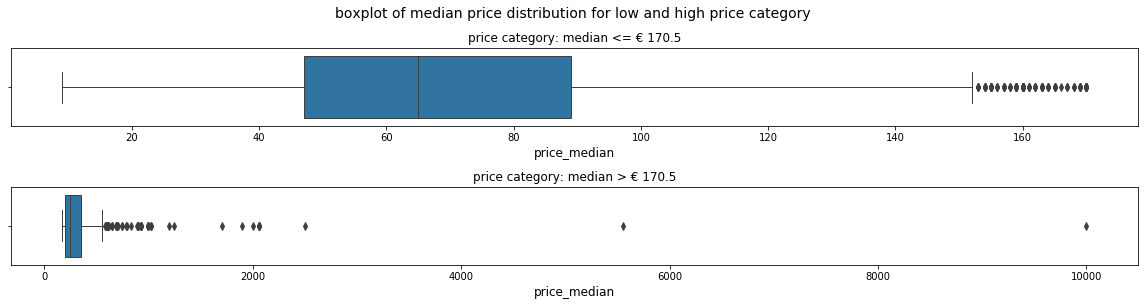

In [33]:
### display box plots with median listing prices to vizualize possible outliers: one for low and one high price category
fig, ax = plt.subplots(2, 1, figsize=(16, 4))

x_price_low = price_stats[price_stats['price_category'] == price_category[0]]['price_median']
sns.boxplot(x = x_price_low, ax = ax[0], linewidth = 1)
ax[0].set_title(f'price category: {price_category[0]}')

x_price_high = price_stats[price_stats['price_category'] == price_category[1]]['price_median']
sns.boxplot(x = x_price_high, ax = ax[1], linewidth = 1)
ax[1].set_title(f'price category: {price_category[1]}')

fig.suptitle('boxplot of median price distribution for low and high price category', y = 1.05)
fig.tight_layout()

<p>In the box plot of the price category - high we see 2 far outliers which are above 5000 €. Before we drop these listings from our analysis data set, let's examine them and see whether the median price is plausible or not.

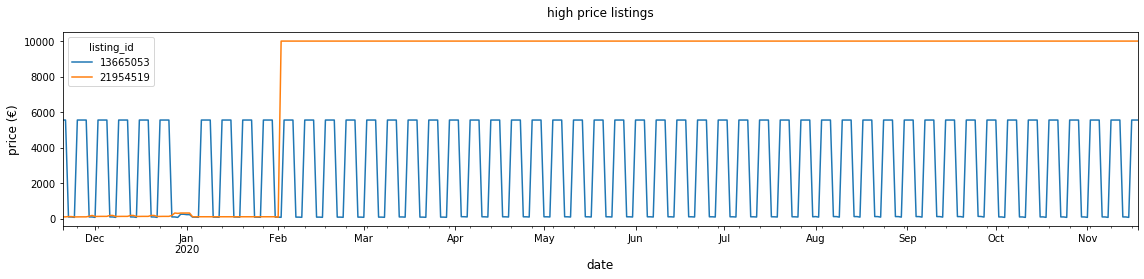

In [34]:
### identfy outlier for high price listings
outlier_high_price_category = price_stats[price_stats['price_median'] > 2500].listing_id

### time plot to vizualize prices throughout the year for these high price listings
fig, ax = plt.subplots(figsize=(16, 4))
for listing_id in outlier_high_price_category:
    calendar_df[calendar_df['listing_id'] == listing_id].plot(x ='date', y ='adjusted_price', ax = ax, 
                                                                      label = listing_id, legend = True)
ax.set_title('high price listings', y=1.05)
ax.set_xlabel('date')
ax.set_ylabel('price (€)')
ax.legend(title = 'listing_id')
fig.tight_layout()

<p>The above listings are definitely outlier of appartments which are likely to contain not reliable price offers. 
<ul>
    <li><b>13665053: </b>is a serviced appartment for 4 accomodates in Leopoldstadt. The price differs periodically between 75 (weekend) and 5555 € (weekday). The lower price can be considered as usual but the 5555 € seems not to be a reliable price offer.</li>
    <li><b>21954519: </b>is a serviced appartment for 3 accomodates in Neubau. The price differs between 80 (before Feburary 2020) and 9999 € (after February 2020). The lower price can be considered as usual but the 9999 € seems not to be a reliable price offer.</li>
</ul>
<p>We will drop both listings, because the unreliable price parts of those listings falsify the median and mean prices we will use for our further analysis.  

In [35]:
### drop selected outliers in calendar_df and price_stats for further price analysis (defined outlier_high_price_category with over 2500 € / night):
calendar_df = calendar_df[~calendar_df['listing_id'].isin(outlier_high_price_category)]
price_stats = price_stats[~price_stats['listing_id'].isin(outlier_high_price_category)]

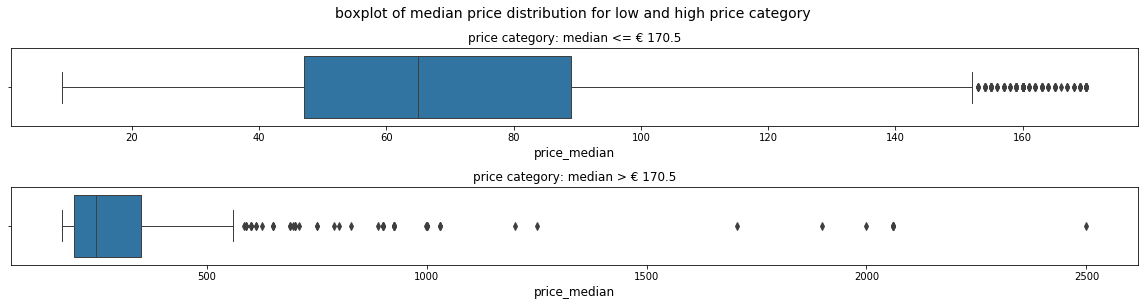

In [36]:
### display box plots with median listing prices after outlier removal: one for low and one high price category
fig, ax = plt.subplots(2, 1, figsize=(16, 4))

x_price_low = price_stats[price_stats['price_category'] == price_category[0]]['price_median']
sns.boxplot(x = x_price_low, ax = ax[0], linewidth = 1)
ax[0].set_title(f'price category: {price_category[0]}')

x_price_high = price_stats[price_stats['price_category'] == price_category[1]]['price_median']
sns.boxplot(x = x_price_high, ax = ax[1], linewidth = 1)
ax[1].set_title(f'price category: {price_category[1]}')

fig.suptitle('boxplot of median price distribution for low and high price category', y = 1.05)
fig.tight_layout()

### Summary Data Preparation

<p>We have performed data cleaning and data engineering on the data sets:

<p><b>data cleaning</b>
<ul>
    <li>drop listings which are never available for the entire existing interval of calendar_df and listings_df</li>
    <li>drop column price from calendar_df</li>
    <li>drop rows with missing numerical values of adjusted price column</li>
    <li>drop columns zipcode, square feet and ammenities from listings_df</li>        
</ul>

<p><b>data engineering</b>
<ul>
    <li>prepare dataframe price_stats including price statistics of 9265 listings</li>
    <li>drop outliers (listings above 2500 €/night) for further price analysis from calendar_df</li>
</ul>

<p>for the modeling and evaluation we have:
<ul>
    <li><b>calendar_df: </b>cleaned data set containing daily availablitiy and pricing per listing
    <li><b>listings_df: </b>cleaned data set containing infromation on type and size of available listings
</ul>

## Modeling and Evaluation<a class='anchor' id='modeling_and_evaluation'></a>

<p>In this chapter we will answer the posed business questions by performing exploratory analysis and price modeling on the cleaned data sets.

### Question 1: Where can we find the most listings in Vienna?

neighbourhood  nr_listings  proportion [%]
11          Leopoldstadt          992       10.719689
10            Landstraße          893        9.649881
8           Innere Stadt          659        7.121245
19  Rudolfsheim-Fünfhaus          602        6.505295
0             Alsergrund          572        6.181111

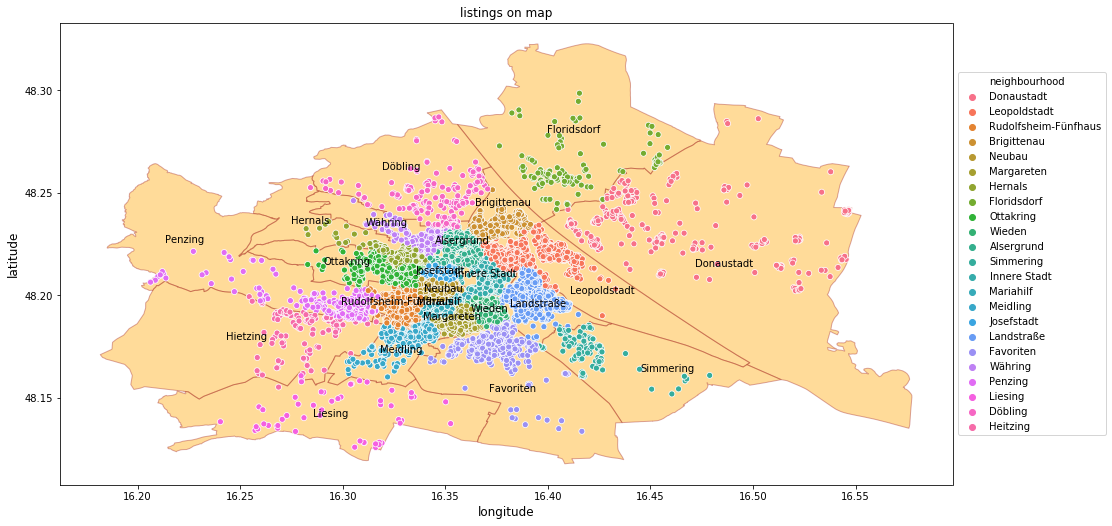

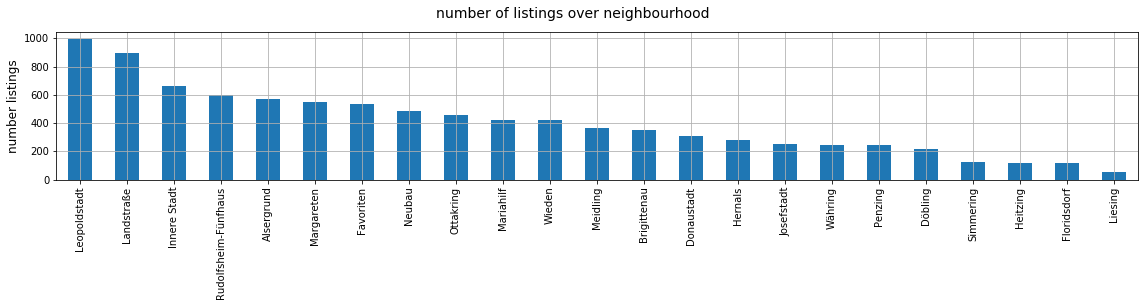

In [37]:
### visualization of listings location on map using map coordinats from neighbourhoods_gdf
### using location coordinates of airbnb appartments (latitude and longitude) from listings_df 
neighbourhoods_gdf.plot(figsize = (16,16), color = 'orange', alpha = 0.4, edgecolor = 'brown')
sns.scatterplot(listings_df.longitude, listings_df.latitude, hue=listings_df.neighbourhood)

### labeling of neighbourhoods (vienna districts) on created map
neighbourhoods_gdf['coords'] = neighbourhoods_gdf['geometry'].apply(lambda x: x.representative_point().coords[:])
neighbourhoods_gdf['coords'] = [coords[0] for coords in neighbourhoods_gdf['coords']]
for idx, row in neighbourhoods_gdf.iterrows():
        plt.annotate(s = row['neighbourhood'], xy = row['coords'], horizontalalignment = 'center', 
                     color = 'black', fontsize = 10)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('listings on map', fontsize = 12)
plt.ioff()

### prepare barplot of number listings per neighbourhood
listings_per_neighbourhood = listings_df.groupby('neighbourhood').agg(nr_listings = ('id', 'count')).reset_index()\
                         .sort_values('nr_listings', ascending = False)
fig, ax = plt.subplots(figsize=(16, 4))

listings_per_neighbourhood.plot(x = 'neighbourhood', y = 'nr_listings', kind = 'bar',
                                ax = ax, legend = False, grid = True, log = False)
ax.set_ylabel('number listings')
ax.set_xlabel('')
    
fig.suptitle('number of listings over neighbourhood', y = 1.05)
fig.tight_layout()

listings_per_neighbourhood['proportion [%]'] = 100 * listings_per_neighbourhood['nr_listings'] / listings_per_neighbourhood['nr_listings'].sum()
display(listings_per_neighbourhood.head(5))

<p><b>Model Results and Evaluation</b>
<p>We have in total 9267 listings which are available for renting in the span between 2019-11-20 to 2020-11-18. The 5 districts with the most Airbnb appartments can be found in following districts:
<ol>
    <li>Leopoldstadt - 10.7 %</li>
    <li>Landstraße - 9.6 %</li>
    <li>Innere Stadt - 7.1 %</li>
    <li>Rudolfsheim-Fünfhaus - 6.5 %</li>
    <li>Alsergrund - 6.2 %</li>
</ol>
<p>These districts are central and nearby the tourists hotspots of the old town.   

In [38]:
### creating base map of vienna with location coordinates of airbnb appartments (latitude and longitude) from listings_df
base_map = folium.Map(location = [48.21, 16.37], titles = "OpenStreetMap Vienna", zoom_start = 12)
neighbourhoods = folium.map.FeatureGroup()

room_type_apt = listings_df[listings_df['room_type'] == 'Entire home/apt']
room_type_private_r = listings_df[listings_df['room_type'] == 'Private room']
room_type_hotel_r = listings_df[listings_df['room_type'] == 'Hotel room']
room_type_shared_r = listings_df[listings_df['room_type'] == 'Shared room']

### preparing a color for each point depending on room type
listings_df['labels_enc'] = pd.factorize(listings_df['room_type'])[0]

for lat, long in zip(room_type_apt.longitude, room_type_apt.latitude):
    neighbourhoods.add_child(folium.CircleMarker([long, lat], radius = 2, color = 'red'))
    
for lat, long in zip(room_type_private_r.longitude, room_type_private_r.latitude):
    neighbourhoods.add_child(folium.CircleMarker([long, lat], radius = 2, color = 'blue'))
    
for lat, long in zip(room_type_hotel_r.longitude, room_type_hotel_r.latitude):
    neighbourhoods.add_child(folium.CircleMarker([long, lat], radius = 2, color = 'green'))
    
for lat, long in zip(room_type_shared_r.longitude, room_type_shared_r.latitude):
    neighbourhoods.add_child(folium.CircleMarker([long, lat], radius = 2, color = 'purple'))

### create legend
from base_map_legend import template # import html and css code for formatting of legend in base map from base_map_legend.py
macro = MacroElement()
macro._template = Template(template)
base_map.get_root().add_child(macro)

base_map.add_child(neighbourhoods)
display(base_map)

### plot html file with base map
#neighbourhoods.save('vienna_airbnb_basemap.html')

### Question 2: Which type and size have the listings?

property_type  nr_listings  proportion [%]
1            Apartment         7925       85.518507
19  Serviced apartment          392        4.230064
8          Condominium          356        3.841588
16               House          184        1.985540
17                Loft          180        1.942376

room_type  nr_listings  proportion [%]
0  Entire home/apt         7424       80.112226
2     Private room         1602       17.287148
1       Hotel room          175        1.888421
3      Shared room           66        0.712205

bed_type  nr_listings  proportion [%]
4       Real Bed         9166       98.910111
3  Pull-out Sofa           71        0.766159
1          Couch           14        0.151074
2          Futon           14        0.151074
0         Airbed            2        0.021582

None None None


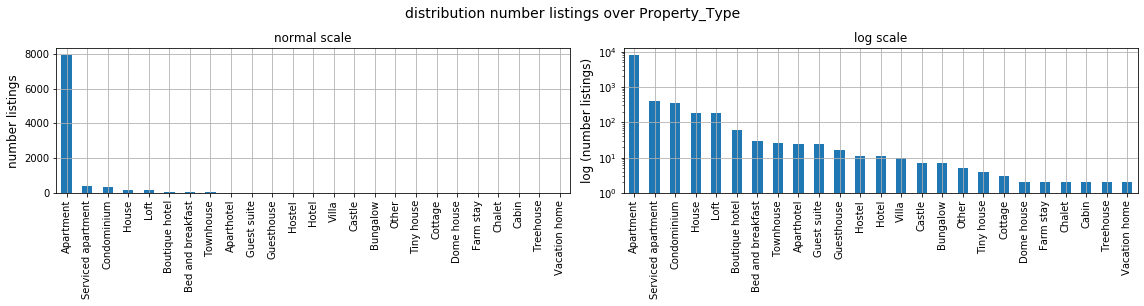

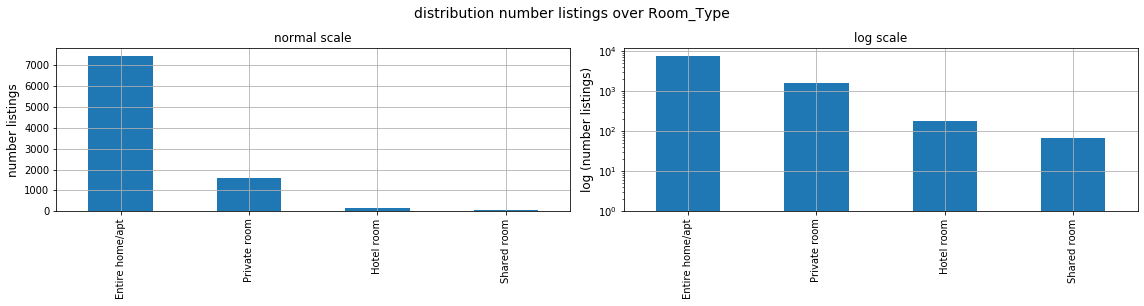

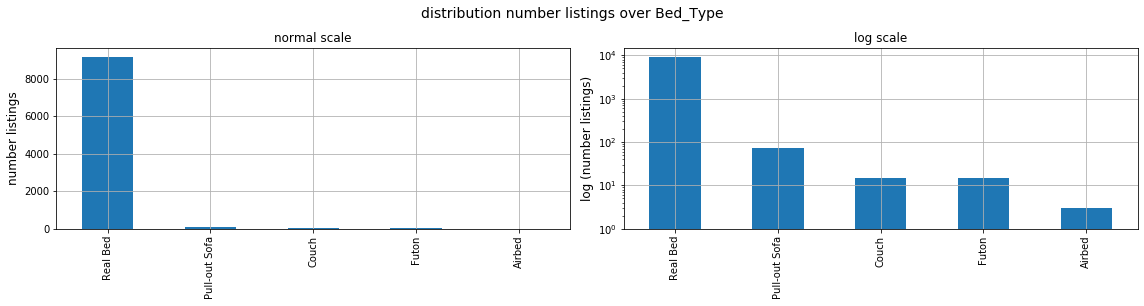

In [39]:
### print bar charts with category property_type, room_type and bed_type in normal and logarithmic scale
print(plot_categoric_bar(listings_df, 'property_type'),
     plot_categoric_bar(listings_df, 'room_type'),
     plot_categoric_bar(listings_df, 'bed_type'))

Text(0.5, 1.0, 'bed types')

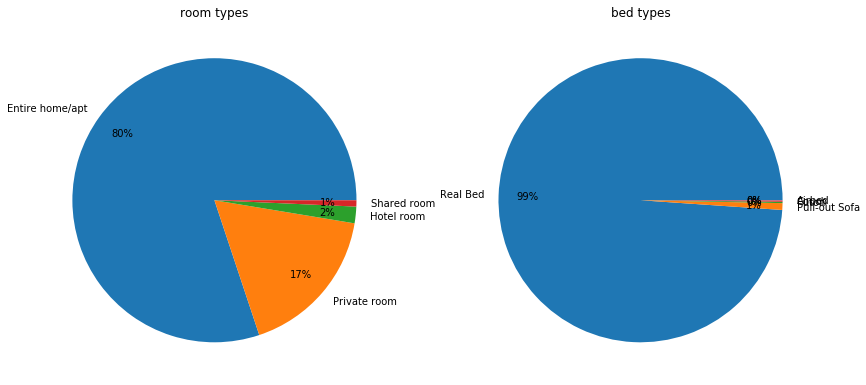

In [40]:
### vizualise pie charts with category room_type and bed_type in normal and logarithmic scale
room_types = listings_df['room_type'].value_counts(normalize = True) * 100
bed_types = listings_df['bed_type'].value_counts(normalize = True) * 100

fig = plt.figure(figsize = (14,10))

plt.subplot(1,2,1)
labels = ['Entire home/apt', 'Private room', 'Hotel room', 'Shared room']
plt.pie(room_types, labels = labels, autopct ='%1.0f%%', pctdistance = 0.8, labeldistance = 1.1)
plt.title('room types')

plt.subplot(1,2,2)
labels = ['Real Bed', 'Pull-out Sofa', 'Futon', 'Couch', 'Airbed']
plt.pie(bed_types, labels = labels, autopct ='%1.0f%%', pctdistance = 0.8, labeldistance = 1.1)
plt.title('bed types')

<p><b>Model Results and Evaluation</b>
<p>Property type: There are totally 25 categories registered for Vienna. The top 5 are:  
<ol>
    <li>Apartment - 85.5 %</li>
    <li>Serviced apartment - 4.2 %</li>
    <li>Condominium - 3.8 %</li>
    <li>House - 2.0 %</li>
    <li>Loft - 1.9 %</li>
</ol>
<p>Room type: There are totally 4 categories registered for Vienna. These are:
<ol>
    <li>Entire home / apt - 80.1 %</li>
    <li>Private room - 17.3 %</li>
    <li>Hotel room - 1.9 %</li>
    <li>Shared room - 0.7 %</li>
</ol>
<p>Bed type: There are totally 5 categories registered for Vienna. These are:  
<ol>
    <li>Real bed - 98.9 %</li>
    <li>Pull-out-sofa - 0.8 %</li>
    <li>Couch - 0.15 %</li>
    <li>Futon - 0.15 %</li>
    <li>Airbed - 0.02 %</li>
</ol>

None None None None


accommodates  nr_listings  proportion [%]
1             2         3050       32.912485
3             4         2778       29.977339
2             3         1107       11.945613
5             6          853        9.204705
4             5          537        5.794756

bathrooms  nr_listings  proportion [%]
2        1.0         6750       72.909916
3        1.5         1841       19.885504
4        2.0          339        3.661698
5        2.5          155        1.674228
1        0.5           49        0.529272

bedrooms  nr_listings  proportion [%]
1       1.0         5700       61.575024
2       2.0         1866       20.157718
0       0.0         1078       11.645241
3       3.0          469        5.066436
4       4.0           93        1.004645

beds  nr_listings  proportion [%]
1   1.0         3809       41.196193
2   2.0         2988       32.316677
3   3.0         1146       12.394549
4   4.0          576        6.229721
5   5.0          202        2.184729

None None None None


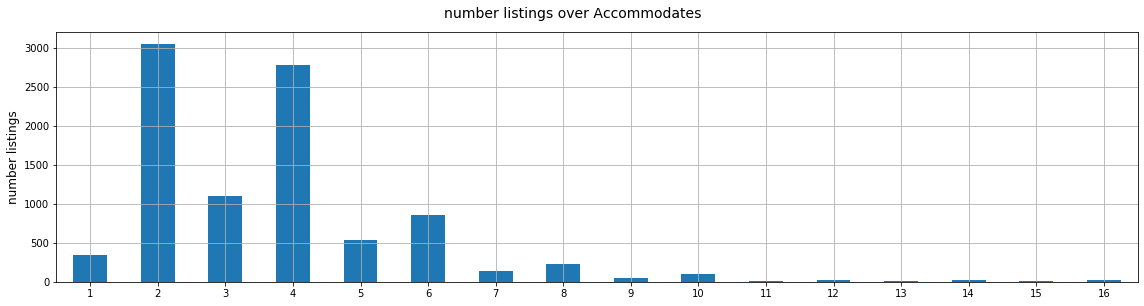

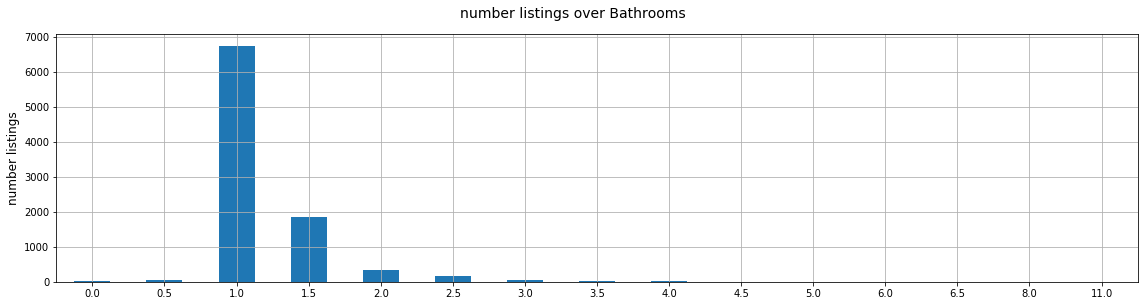

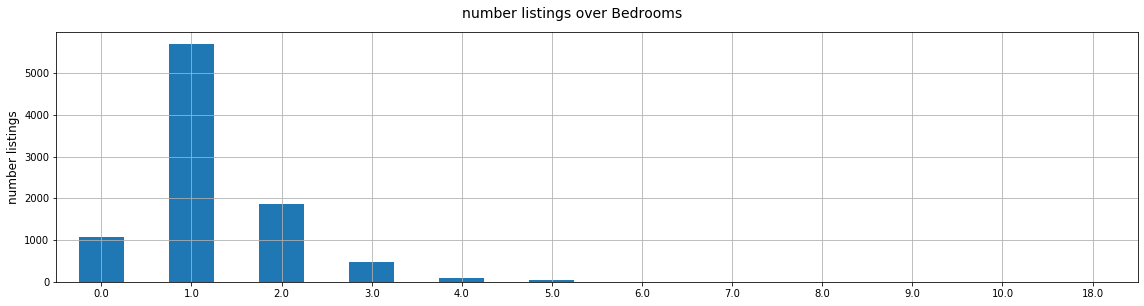

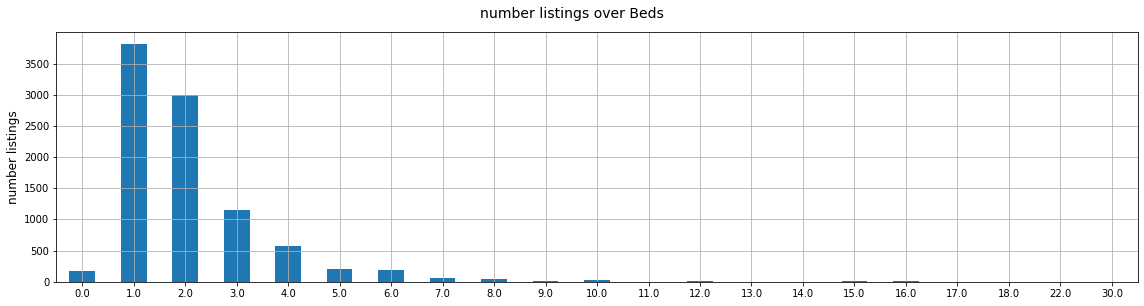

In [41]:
def plot_numeric_bar(df, col):
    """
    Aggregates and sorts numerical data of one independent variable and plots bar chart with normal and log scale 
    INPUT:
        df - dataframe with selected data
        cols - column with independent variable to be aggregated and sorted     
    OUTPUT:
        2 bar charts: Left bar chart shows independent variable with normal scale count and 
        right bar chart shows independent variable with logaritmic scale count
    """
    agg = df.groupby(col).agg(nr_listings = ('id', 'count')).reset_index()
    fig, ax = plt.subplots(figsize=(16, 4))

    agg.plot(x = col, y = 'nr_listings', kind = 'bar', ax = ax, legend = False, grid = True, log = False)
    ax.set_ylabel('number listings')
    ax.set_xlabel('')
    plt.xticks(rotation = 0)
    
    fig.suptitle(('number listings over ' + col.title()), y = 1.05)
    fig.tight_layout()

### print bar charts with listing count of number of accommodates, bathrooms, bedrooms, beds per airbnb appartment
print(plot_numeric_bar(listings_df, 'accommodates'),
     plot_numeric_bar(listings_df, 'bathrooms'),
     plot_numeric_bar(listings_df, 'bedrooms'),
     plot_numeric_bar(listings_df, 'beds'))

def numeric_top_five(df, col):
    agg = df.groupby(col).agg(nr_listings = ('id', 'count')).reset_index()\
                         .sort_values('nr_listings', ascending = False)
    agg['proportion [%]'] = 100 * agg['nr_listings'] / agg['nr_listings'].sum()
    display(agg.head(5))

### print top 5 list with listing count of number of accommodates, bathrooms, bedrooms, beds per airbnb appartment
print(numeric_top_five(listings_df, 'accommodates'),
     numeric_top_five(listings_df, 'bathrooms'),
     numeric_top_five(listings_df, 'bedrooms'),
     numeric_top_five(listings_df, 'beds'))

<p><b>Model Results and Evaluation</b>
<p>Accommodates: There are appartments for 1 to 16 accommodates registered for Vienna. The most frequent accommodates numbers are:  
<ol>
    <li>2 - 32.9 %</li>
    <li>4 - 30.0 %</li>
    <li>3 - 11.9 %</li>
    <li>6 - 9.2 %</li>
    <li>5 - 5.8 %</li>
</ol>
<p>Bathrooms: There are appartments with 0 to (incredible) 11 bathrooms registered for Vienna. The most frequent bathroom numbers are:
<ol>
    <li>1 - 72.9 %</li>
    <li>1.5 - 19.9 %</li>
    <li>2 - 3.7 %</li>
    <li>2.5 - 1.7 %</li>
    <li>0.5 - 0.5 %</li>
</ol>
<p>Bedrooms: There are appartments with 0 to 18 bedrooms registered for Vienna. The most frequent bedroom numbers are:
<ol>
    <li>1 - 61.6 %</li>
    <li>2 - 20.2 %</li>
    <li>0 - 11.6 %</li>
    <li>3 - 5.1 %</li>
    <li>4 - 1.0 %</li>
</ol>
<p>Beds: There are appartments with 0 to 30 beds registered for Vienna. The most frequent bed numbers are:
<ol>
    <li>1 - 41.2 %</li>
    <li>2 - 32.3 %</li>
    <li>3 - 12.4 %</li>
    <li>4 - 6.2 %</li>
    <li>5 - 2.2 %</li>
</ol>

### Question 3: Which are the cheapest and the most expensive districts in Vienna?

In [42]:
### define subgroups for separating dataset into subgroups
subgroups = ['price_category']

### define which listing features to be examined
location_features = ['neighbourhood']
size_features = ['accommodates', 'bathrooms', 'bedrooms', 'beds']
type_features = ['property_type', 'room_type']
property_features = location_features + size_features + type_features

In [43]:
### set id column as new index
listings_df = listings_df.set_index('id')

### Merge selected property features from listings_df with calendar_df and form new dataframe listings_properties 
### execute only 1 time !!!
listing_properties = calendar_df.rename(columns = {'listing_id': 'id'}).set_index('id')\
                             .groupby(['id', 'price_category'])\
                             .agg(price_median = ('adjusted_price', 'median'),
                                  price_mean = ('adjusted_price', 'mean')).reset_index()\
                             .merge(listings_df[property_features], on ='id').set_index('id')

### calculate and add median and mean price per bedroom to listing_properties dataframe
listing_properties['price_median_per_accommodate'] = (listing_properties['price_median'] / listing_properties['accommodates'])
listing_properties['price_mean_per_accommodate'] = (listing_properties['price_mean'] / listing_properties['accommodates'])

### display sample of adapted dataframe
display(listing_properties.sample(5, random_state = 42))

price_category  price_median  price_mean neighbourhood  \
id                                                                    
39057242  median <= € 170.5          25.0   25.000000       Penzing   
38997549  median <= € 170.5          18.0   18.200000     Ottakring   
19280465  median <= € 170.5          50.0   52.906849    Landstraße   
15962363  median <= € 170.5          74.0   65.320548  Leopoldstadt   
40084992  median <= € 170.5         100.0   99.808219  Innere Stadt   

          accommodates  bathrooms  bedrooms  beds property_type  \
id                                                                
39057242             1        1.5       1.0   1.0     Apartment   
38997549             2        1.0       2.0   1.0     Apartment   
19280465             4        1.0       1.0   1.0     Apartment   
15962363             5        1.0       1.0   5.0     Apartment   
40084992             4        1.0       0.0   2.0     Apartment   

                room_type  price_median_per_accommodate  \
id                                                        
39057242     Private room                          25.0   
38997549     Private room                           9.0   
19280465  Entire home/apt                          12.5   
15962363  Entire home/apt                          14.8   
40084992  Entire home/apt                          25.0   

          price_mean_per_accommodate  
id                                    
39057242                   25.000000  
38997549                    9.100000  
19280465                   13.226712  
15962363                   13.064110  
40084992                   24.952055

In [44]:
### prepare dataframes with listing_properties for low price and high price category
listing_properties_low_price = listing_properties[listing_properties['price_category'] == price_category[0]]
listing_properties_high_price = listing_properties[listing_properties['price_category'] == price_category[1]]

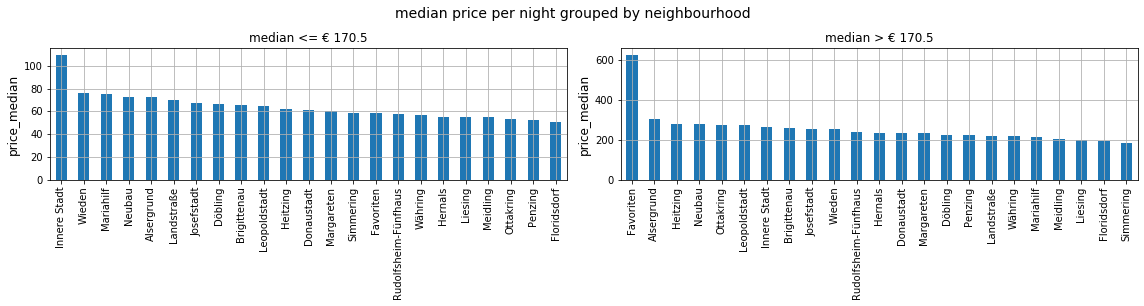

In [45]:
### print bar charts with median price of listings per neighbourghood devided into low and high price category
price_neighbourhood_low = pd.DataFrame(listing_properties_low_price.groupby(['neighbourhood'])['price_mean']\
                                       .agg(np.median)).reset_index().sort_values('price_mean', ascending = False)\
                                       .rename(columns={'price_mean': 'price_median'}) 

price_neighbourhood_high = pd.DataFrame(listing_properties_high_price.groupby(['neighbourhood'])['price_mean']\
                                        .agg(np.median)).reset_index().sort_values('price_mean', ascending = False)\
                                        .rename(columns={'price_mean': 'price_median'}) 

fig, ax = plt.subplots(1, 2, figsize=(16, 4))
    
price_neighbourhood_low.plot(x = 'neighbourhood', y = 'price_median', kind = 'bar',
                                ax = ax[0], legend = False, grid = True, log = False)
ax[0].set_title(price_category[0])
ax[0].set_ylabel('price_median')
ax[0].set_xlabel('')

price_neighbourhood_high.plot(x = 'neighbourhood', y = 'price_median', kind = 'bar',
                                ax = ax[1], legend = False, grid = True, log = False)
ax[1].set_title(price_category[1])
ax[1].set_ylabel('price_median')
ax[1].set_xlabel('')

fig.suptitle('median price per night grouped by neighbourhood', y = 1.05)
fig.tight_layout()

In [46]:
display(price_category[0],price_neighbourhood_low,
       price_category[1],price_neighbourhood_high)

'median <= € 170.5'

neighbourhood  price_median
8           Innere Stadt    110.047945
21                Wieden     76.084932
14             Mariahilf     75.139726
16                Neubau     72.682192
0             Alsergrund     72.526027
10            Landstraße     70.000000
9             Josefstadt     67.439726
3                Döbling     66.780822
1            Brigittenau     66.058904
11          Leopoldstadt     65.000000
6               Heitzing     61.864384
2             Donaustadt     60.841096
13            Margareten     60.000000
20             Simmering     58.421918
4              Favoriten     58.306849
19  Rudolfsheim-Fünfhaus     58.186301
22               Währing     57.145205
7                Hernals     55.287671
12               Liesing     55.000000
15              Meidling     55.000000
17             Ottakring     53.098630
18               Penzing     52.615068
5            Floridsdorf     50.934247

'median > € 170.5'

neighbourhood  price_median
4              Favoriten    627.254795
0             Alsergrund    303.835616
6               Heitzing    280.630137
16                Neubau    276.821918
17             Ottakring    276.410959
11          Leopoldstadt    272.827397
8           Innere Stadt    265.498630
1            Brigittenau    257.290411
9             Josefstadt    254.520548
21                Wieden    254.126027
19  Rudolfsheim-Fünfhaus    237.323288
7                Hernals    234.753425
2             Donaustadt    233.693151
13            Margareten    232.287671
3                Döbling    222.383562
18               Penzing    221.923288
10            Landstraße    220.000000
22               Währing    218.321918
14             Mariahilf    215.000000
15              Meidling    203.520548
12               Liesing    198.849315
5            Floridsdorf    195.000000
20             Simmering    181.972603

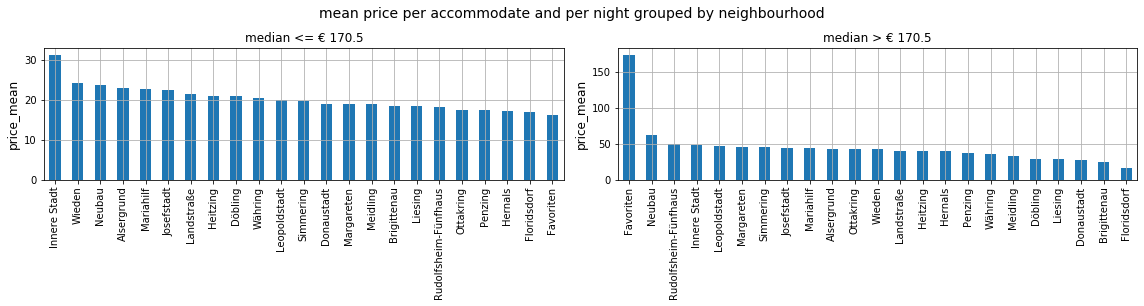

In [48]:
### print bar charts with median price per accommodate of listings per neighbourghood devided into low and high price category
price_neighbourhood_low_acc = pd.DataFrame(listing_properties_low_price.groupby(['neighbourhood'])
                                           ['price_mean_per_accommodate']\
                                       .agg(np.median)).reset_index().sort_values('price_mean_per_accommodate', 
                                                                                  ascending = False)\
                                       .rename(columns={'price_mean_per_accommodate': 'price_mean_acc'}) 

price_neighbourhood_high_acc = pd.DataFrame(listing_properties_high_price.groupby(['neighbourhood'])
                                            ['price_mean_per_accommodate']\
                                       .agg(np.median)).reset_index().sort_values('price_mean_per_accommodate', 
                                                                                  ascending = False)\
                                       .rename(columns={'price_mean_per_accommodate': 'price_mean_acc'})

fig, ax = plt.subplots(1, 2, figsize=(16, 4))
    
price_neighbourhood_low_acc.plot(x = 'neighbourhood', y = 'price_mean_acc', kind = 'bar',
                                ax = ax[0], legend = False, grid = True, log = False)
ax[0].set_title(price_category[0])
ax[0].set_ylabel('price_mean')
ax[0].set_xlabel('')

price_neighbourhood_high_acc.plot(x = 'neighbourhood', y = 'price_mean_acc', kind = 'bar',
                                ax = ax[1], legend = False, grid = True, log = False)
ax[1].set_title(price_category[1])
ax[1].set_ylabel('price_mean')
ax[1].set_xlabel('')

fig.suptitle('mean price per accommodate and per night grouped by neighbourhood', y = 1.05)
fig.tight_layout()

In [49]:
display(price_category[0],price_neighbourhood_low_acc,
       price_category[1],price_neighbourhood_high_acc)

'median <= € 170.5'

neighbourhood  price_mean_acc
8           Innere Stadt       31.319863
21                Wieden       24.155936
16                Neubau       23.584932
0             Alsergrund       22.913699
14             Mariahilf       22.582192
9             Josefstadt       22.460502
10            Landstraße       21.363699
6               Heitzing       20.962740
3                Döbling       20.887671
22               Währing       20.500000
11          Leopoldstadt       20.028082
20             Simmering       19.683562
2             Donaustadt       19.000000
13            Margareten       18.948630
15              Meidling       18.916438
1            Brigittenau       18.403288
12               Liesing       18.342466
19  Rudolfsheim-Fünfhaus       18.301370
17             Ottakring       17.553425
18               Penzing       17.501370
7                Hernals       17.290411
5            Floridsdorf       17.054795
4              Favoriten       16.180822

'median > € 170.5'

neighbourhood  price_mean_acc
4              Favoriten      175.000000
16                Neubau       62.500000
19  Rudolfsheim-Fünfhaus       50.000000
8           Innere Stadt       49.079452
11          Leopoldstadt       46.947945
13            Margareten       45.833333
20             Simmering       45.493151
9             Josefstadt       44.244521
14             Mariahilf       44.085845
0             Alsergrund       43.073425
17             Ottakring       42.369041
21                Wieden       42.248630
10            Landstraße       40.476712
6               Heitzing       40.090020
7                Hernals       40.000000
18               Penzing       36.987215
22               Währing       35.782078
15              Meidling       33.333333
3                Döbling       28.571429
12               Liesing       28.407045
2             Donaustadt       26.889237
1            Brigittenau       24.804795
5            Floridsdorf       16.250000

both values for Favoriten low price and high price are far above the other median prices of the neighbourhoods. This isn't plausible and therefore we need to check the listings

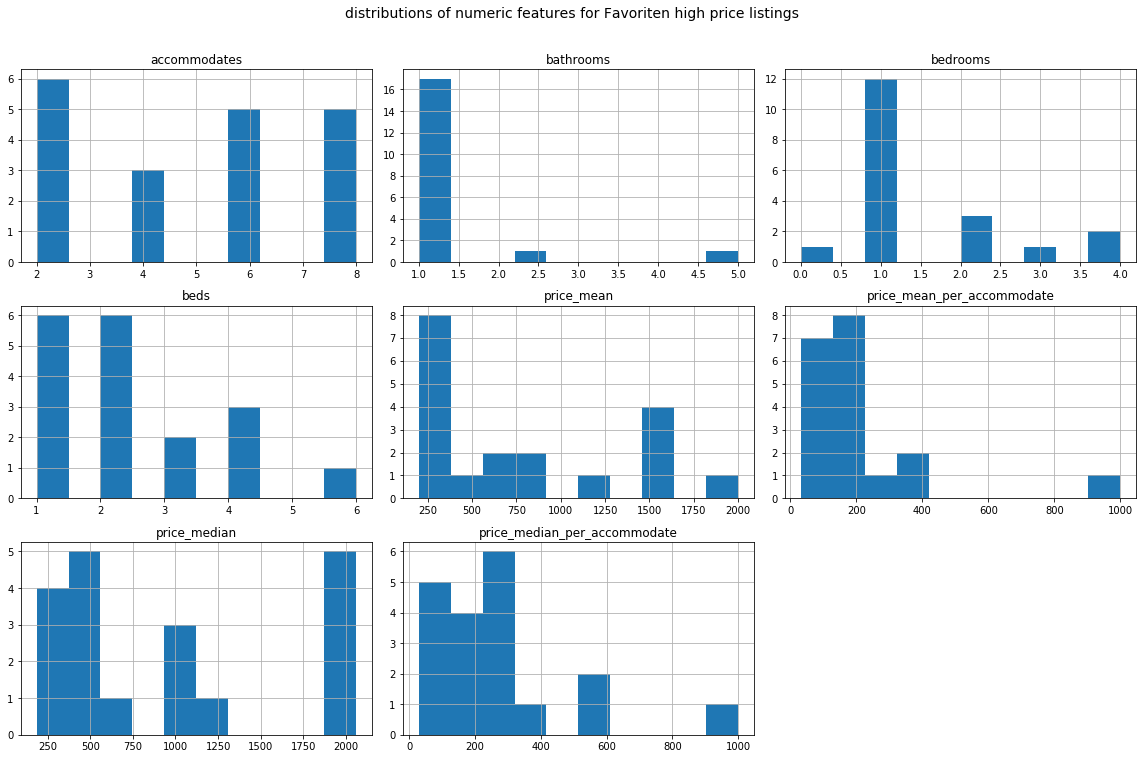

In [50]:
### print histograms of numerical data of listings_high_price in district Favoriten district 
listings_high_price_favoriten = listing_properties[(listing_properties['neighbourhood'] == 'Favoriten')\
                                                   & (listing_properties['price_category'] == price_category[1])]

listings_high_price_favoriten.select_dtypes(include=np.number).hist(figsize = (16, 10), log = False)
plt.suptitle('distributions of numeric features for Favoriten high price listings', y=1.05)
plt.tight_layout()

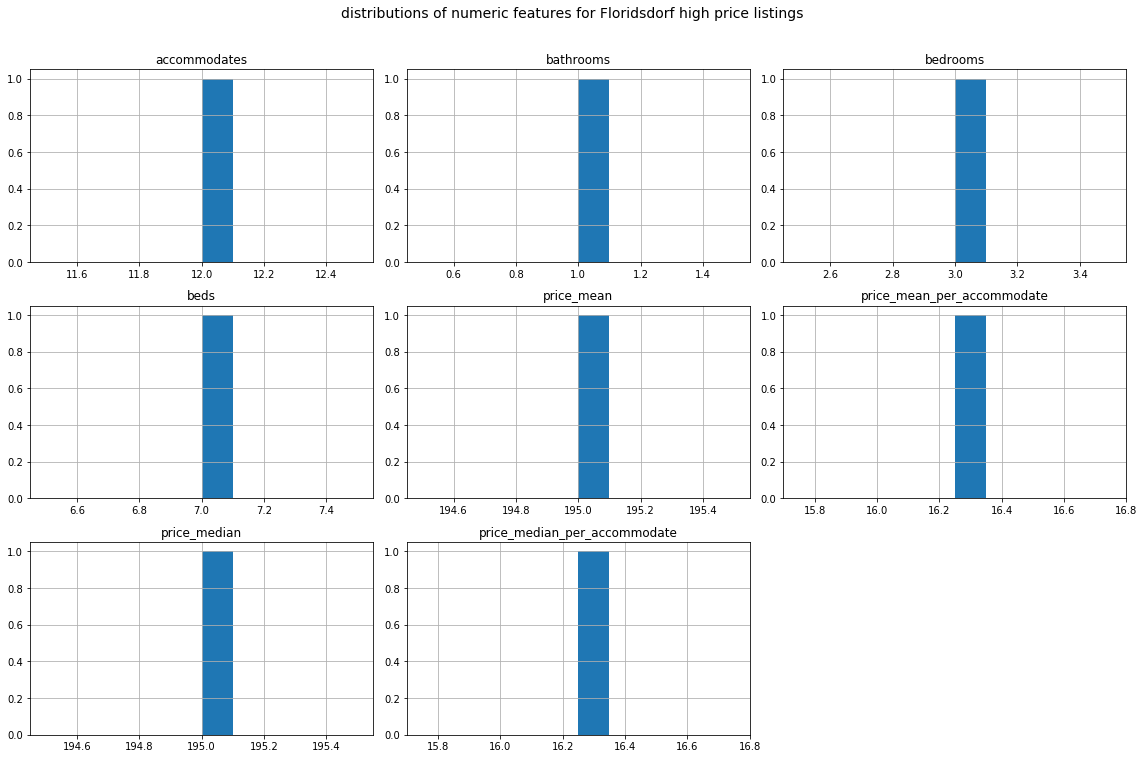

In [51]:
### print histograms of numerical data of listings_high_price in district Favoriten district 
listings_high_price_favoriten = listing_properties[(listing_properties['neighbourhood'] == 'Floridsdorf')\
                                                   & (listing_properties['price_category'] == price_category[1])]

listings_high_price_favoriten.select_dtypes(include=np.number).hist(figsize = (16, 10), log = False)
plt.suptitle('distributions of numeric features for Floridsdorf high price listings', y=1.05)
plt.tight_layout()

<p><b>Model Results and Evaluation</b>
<p>The 5 most expensive districts in low price category according to median price per district are:  
<ol>
    <li>Innere Stadt - 110.05 € total / 30.00 € per accommodate</li>
    <li>Wieden - 76.08 € total / 23.95 € per accommodate</li>
    <li>Marihilf - 75.14 € total / 22.50 € per accommodate</li>
    <li>Neubau - 72.68 € total / 23.00 € per accommodate</li>
    <li>Alsergrund - 72.53 € total / 22.50 € per accommodate</li>
</ol>
<p>The 5 cheapest districts in low price category according to median price per district are:  
<ol>
    <li>Floridsdorf - 50.93 € total / 16.50 € per accommodate</li>
    <li>Penzing - 52.62 € total / 16.71 € per accommodate</li>
    <li>Ottakring - 53.10 € total / 17.50 € per accommodate</li>
    <li>Meidling - 55.00 € total / 18.33 € per accommodate</li>
    <li>Liesing - 55.00 € total / 17.25 € per accommodate</li>
</ol>

<p>The 5 most expensive districts in high price category according to median price per district are:  
<ol>
    <li>Favoriten - 627.25 € total / 250.00 € per accommodate</li>
    <li>Alsergrund - 303.84 € total / 40.80 € per accommodate</li>
    <li>Heitzing - 280.63 € total / 40.00 € per accommodate</li>
    <li>Neubau - 276.82 € total / 50.00 € per accommodate</li>
    <li>Ottakring - 276.41 € total / 41.67 € per accommodate</li>
</ol>
<p>The 5 cheapest districts in high price category according to median price per district are:  
<ol>
    <li>Simmering - 191.97 € total / 45.00 € per accommodate</li>
    <li>Floridsdorf - 195.00 € total / 16.25 € per accommodate</li>
    <li>Liesing - 198.85 € total / 28.57 € per accommodate</li>
    <li>Meidling - 203.52 € total / 33.33 € per accommodate</li>
    <li>Mariahilf - 215.00 € total / 43.33 € per accommodate</li>
</ol>
<p>The low price category median prices seem to be plausible. However the high price category contains at first view some interesting surprises which can be explained as follows:
<ul>
    <li><b>Favoriten </b>has by far the highest median price per appartment and per accommodate. When looking at the distribution of the listing prices we can see that 6 listings out of 19 are offered for a price over 1000 €. These 6 listings over 1000 € increase the median price per neighbourhood massively due to the small number of listings.</li>
    <li><b>Floridsdorf </b>has a 12 times higher median total price as the price per accommodate. This is because we have for this neighbourhood only 1 sample with a capacity of 12 accommodates.</li>
</ul>

### Question 4: When is the most suitable time to rent an Airbnb appartment in terms of price and availability?

<p>To answer this question we will prepare data from calendar_df and vizualise availability and pricing in a chart for low and high price category. We will perform modeling on following data: 
<ul>
    <li>adjusted_price: compute daily mean prices and calculate its deviation from the overall mean price. To see price trends throughout the year we will look at the percent deviation from the overall mean price</li>
    <li>available: compute daily mean availability of the appartments</li>
</ul>

In [52]:
def generate_daily_avg_trends(calendar, values = ['adjusted_price', 'available'], subgroups = ['price_category']):
    """
    Return dataframe with mean daily trends of selected values including its percent deviation for each subgroup  
    INPUT:
        calendar - dataframe including daily price and availablity records
        values - string with column names for which mean trends are to be generated
        subgroups - string with column name of selected subgroups
                           
    OUTPUT:
        trend as pd.DataFrame containing average price and availability trends with following columns

    """
    assert 'date' in calendar.columns, 'Error!!! date column could not be found'
    
    df = calendar
    
    ### calculate overall mean value for selected values and selected subgroup
    subgroup_avg = df.groupby(subgroups)[values].mean().reset_index()\
                     .rename(columns={col: col + '_subgroup_avg' for col in values})
    
    ### calculate daily mean value for selected values and selected subgroup
    date_subgroup_avg = df.groupby(['date'] + subgroups)[values].mean().reset_index()\
                          .rename(columns={col: col + '_daily_subgroup_avg' for col in values})
    
    ### merge overall and daily mean values by subgroups
    trend = subgroup_avg.merge(date_subgroup_avg, on=subgroups)
    
    ### calulate and add daily percent deviation from overall subgroup mean of selected values
    for col in values:
        trend[col + '_daily_pdev'] = (100.0 * (trend[col + '_daily_subgroup_avg'] - trend[col + '_subgroup_avg']) 
                                      / trend[col + '_subgroup_avg'])
    
    return trend

In [53]:
### define public holidays for time span (2019-11-20 to 2020-11-18) corresponding to values in calendar_df 
holidays = {'Christmas Eve': np.datetime64('2019-12-24'),
            'New Year': np.datetime64('2020-01-01'),
            'Easter Monday': np.datetime64('2020-04-13'),
            'Labor Day': np.datetime64('2020-05-01'),
            'Ascension': np.datetime64('2020-05-21'),
            'Whit Monday': np.datetime64('2020-06-01'),
            'Corpus Christi': np.datetime64('2020-06-11'),
            'National Holiday Austria': np.datetime64('2020-10-26')}

def exclude_holiday_weeks(calendar, holidays = holidays):
    """
    Drop weeks from calendar dataframe which have major holidays inside 
    or weeks preceeding holiday week if holiday falls on Monday or Tuesday.
    INPUT:
        calendar - calendar dataframe containing date column
        holidays - np.datetime64 dictionary containing holiday names and dates in numpy.datetime64 format      
    OUTPUT:
        df - dataframe output calendar with weeks excluding holidays
    """
    df = calendar.copy()
    
    ### add column with week number to calendar dataframe
    df['week'] = df['date'].dt.week  
    
    ### list of week numbers to exclude from weekend/weekday difference analysis
    excluded_weeks = []  
    
    for _, date in holidays.items():
        ### convert np.datetime64 to pd.date
        pd_date = pd.to_datetime(date)  
    
        ### exclude holiday week
        holiday_week = pd_date.week  
        excluded_weeks.append(holiday_week)

        ### exclude preceeding holiday week if holiday is on Monday or Tuesday
        holiday_day_of_week = pd_date.dayofweek
        if holiday_day_of_week < 2:
            excluded_weeks.append(holiday_week - 1)
    
    df = df[~df.week.isin(excluded_weeks)] 
    
    return df

In [54]:
def drop_fixed_value_groups(df, values, by):
    """
    Drop fixed-value groups from input dataframe   
    INPUT:
        df - input dataframe
        values - column name as sting containing values to be examined for variability
        by - column name as string containing group keys    
    OUTPUT:
        df - output dataframe with removed fixed_value groups   
    """
    agg = df.groupby(by)[values].nunique()
    fixed_value_group_keys = agg[agg == 1].index.values
    df = df[~df[by].isin(fixed_value_group_keys)]
    
    return df

In [55]:
def weekend_weekday_diff(calendar, value_col, subgroups=['price_category']):
    """
    Return mean weekday, mean weekend prices and its difference for each week of the calendar amd each subgroup    
    INPUT:
        calendar - calendar dataframe containing date column 
        calue_col - column name as sting containing daily prices for comparison                        
        subgroups - string with column name of selected subgroups     
    OUTPUT:
        weekly - dataframe with mean weekday, mean weekend prices and mean difference in percent of weekend-weekday prices
                 for each subgroup and each calendar week
    """
    df = calendar.copy()
    
    ### add column with week number to calendar for keeping track of the year
    df['week'] = df.date.dt.strftime('%Y-%W')
    
    ### add column indicating weekend/weekday (weekend prices actually correspond to friday (dayofweek=4) and saturday(dayofweek=5))
    df['weekend'] = np.where((pd.DatetimeIndex(df.date).dayofweek==4) 
                             | (pd.DatetimeIndex(df.date).dayofweek==5), 1, 0)
    
    group_cols = subgroups + ['week', 'weekend']
    index_cols = subgroups + ['week']
    
    ### calculate subgroup mean prices for weekdays and weekends for each week
    weekly = df.groupby(group_cols)\
               .agg(avg_price=(value_col, 'mean')).reset_index()\
               .pivot_table(values='avg_price', columns='weekend', index=index_cols).reset_index()\
               .rename(columns={0: 'weekday_price_avg', 1: 'weekend_price_avg'})
    
    ### convert absolute difference into percent difference from weekday price
    weekly['price_pdiff'] = (100.0 * (weekly.weekend_price_avg - weekly.weekday_price_avg) 
                             / weekly.weekday_price_avg)
    
    return weekly

In [56]:
def weekend_weekday_diff_pipeline(calendar, subgroups=['price_category'],
                                  exclude_fixed_price = False, exclude_holidays = True, holidays={}):
    """
    Analysis pipeline for evaluating weekend-weekday price differences by input subgroups
    INPUT:
        calendar - calendar dataframe containing daily prices for each listing with columns: 
                   'price', 'listing_id', 'price_caterory'
        subgroups - string with column name of selected subgroups
        exclude_fixed_price - boolian for excluding listings with fixed price from analysis if True, include otherwise
        exclude_holidays - boolian for dropping weeks which have major holidays inside if Ture, include otherwise
        holidays - np.datetime64 dictionary containing holiday names and dates in numpy.datetime64 format      
    OUTPUT:
        weekly - dataframe containing difference weekend-weekday mean prices for each week grouped by subgroups
    """
    
    if exclude_fixed_price:
        df = drop_fixed_value_groups(df = calendar, values = 'adjusted_price', by ='listing_id')
    else:
        df = calendar
        
    trend = generate_daily_avg_trends(calendar = df, values = ['adjusted_price'], subgroups = ['price_category'])
    if exclude_holidays:
        trend = exclude_holiday_weeks(calendar = trend, holidays = holidays)
        
    weekly = weekend_weekday_diff(calendar = trend, 
                                  value_col = 'adjusted_price_daily_subgroup_avg', subgroups=['price_category'])
    
    return weekly

In [57]:
### prepare dataframe including daily average trends for price and availability
trend_all = generate_daily_avg_trends(calendar = calendar_df, 
                                      values=['adjusted_price', 'available'], subgroups=['price_category'])
### display sample of prepared dataframe
display(trend_all.sample(3, random_state=42))

price_category  adjusted_price_subgroup_avg  available_subgroup_avg  \
468   median > € 170.5                   336.647913                0.620137   
148  median <= € 170.5                    74.441548                0.482271   
302  median <= € 170.5                    74.441548                0.482271   

          date  adjusted_price_daily_subgroup_avg  \
468 2020-03-02                         319.191291   
148 2020-04-16                          72.178961   
302 2020-09-17                          78.521225   

     available_daily_subgroup_avg  adjusted_price_daily_pdev  \
468                      0.772939                  -5.185424   
148                      0.564950                  -3.039415   
302                      0.417189                   5.480376   

     available_daily_pdev  
468             24.640141  
148             17.143808  
302            -13.494913

Text(0.5, 1.0, 'Airbnb listing availability and price trends in course of the year\nfrom 2019-11-20 to 2020-11-18')

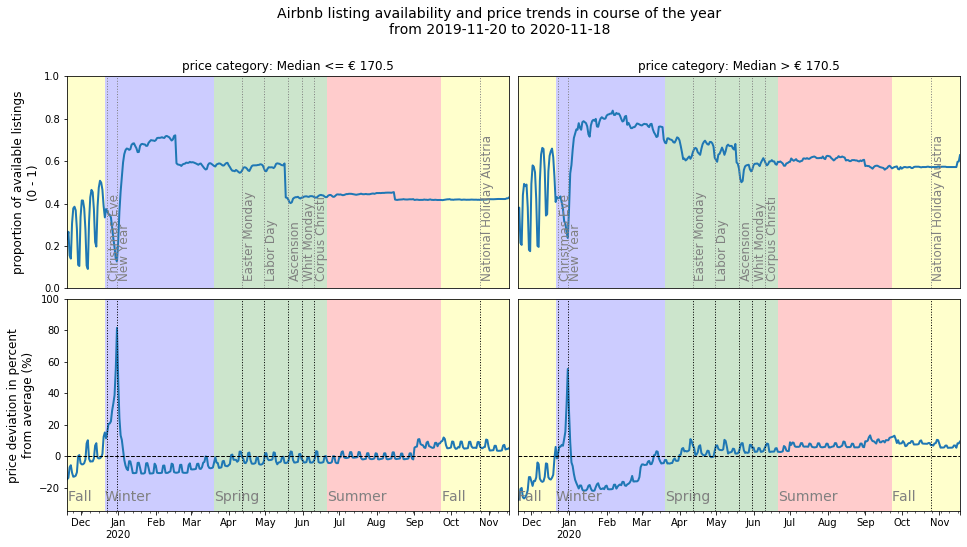

In [58]:
### plot figure with 4 line charts showing availability and price deviation throughout the year 
fig = plt.figure(figsize=(16, 8), constrained_layout = False)

### setup grid layout
outer_grid = fig.add_gridspec(1, 2, wspace = 0.02, hspace = 0)
for i in range(2):
    inner_grid = outer_grid[i].subgridspec(2, 1, wspace = 0, hspace = 0.05)
    for j in range(2):
        fig.add_subplot(inner_grid[j])

ax = fig.get_axes()

### plot for each price category
for idx, price_bin in enumerate(price_category):
    
    ### graph index shortcuts (ax_av = avilability graph, ax_price = price graph)
    ax_av = ax[2 * idx]
    ax_price = ax[2 * idx + 1]
    
    ### axes transform for text labels
    transform_av = ax_av.get_xaxis_transform()  
    transform_price = ax_price.get_xaxis_transform()  
           
    ### prepare subset of data
    data = trend_all[(trend_all['price_category'] == price_bin)]
        
    ### plot daily availability of listings
    data.plot(x='date', y='available_daily_subgroup_avg', legend = False, linewidth = 2, ax = ax_av)
        
    ### plot price percent deviation from mean daily prices
    data.plot(x='date', y='adjusted_price_daily_pdev', legend = False, linewidth = 2, ax = ax_price)    
    
    ### formatting of axes, legends, titles
    ax_av.set_title(f'price category: {price_bin.capitalize()}')
    ax_av.axes.get_xaxis().set_visible(False)
    ax_av.set_ylim(0, 1)
    ax_price.set_xlabel('')
    ax_price.set_ylim(-35, 100)
    
    ### add dashed line to mark 0 % for price percent deviation charts
    ax_price.axhline(y = 0, color = 'k', linestyle = 'dashed', linewidth=1)

    ### shade seasons with different colors
    season_cuts = [data.date.min().date(), 
                   np.datetime64('2019-12-21'),
                   np.datetime64('2020-03-20'),
                   np.datetime64('2020-06-21'),
                   np.datetime64('2020-09-23'),
                   data.date.max().date()]
    season_colors = ['yellow', 'blue', 'green', 'red', 'yellow']
    
    for start, end, season_color in zip(season_cuts[:-1], season_cuts[1:], season_colors):
        ax_av.axvspan(start, end, facecolor = season_color, alpha = 0.2)
        ax_price.axvspan(start, end, facecolor = season_color, alpha = 0.2)

    ### add season labels
    for name, offset in zip(['Fall', 'Winter', 'Spring', 'Summer', 'Fall'], season_cuts[:-1]):
        ax_price.text(offset, 0.05, name, rotation = 0, color = 'grey', transform = transform_price, fontsize=14)
    
    ### add holiday markers
    for name, date in holidays.items():
        ### boookings for a holiday day are actually booked for the night before
        date -= np.timedelta64(1,'D')
        ax_av.axvline(x = date, color = 'grey', linestyle = 'dotted', linewidth = 1)
        
        ### text position offset relative to marker line
        if name == 'Christmas':
            offset = date - np.timedelta64(8, 'D')
        else:
            offset = date + np.timedelta64(1, 'D')

        ax_av.text(offset, 0.05, name, rotation = 90, color = 'grey', transform = transform_av, fontsize = 12)
        ax_price.axvline(x = date, color = 'k', linestyle = 'dotted', linewidth = 1)

### clean up ticks and labels
ax[0].set_ylabel('proportion of available listings\n(0 - 1)', fontsize=12)
ax[1].set_ylabel('price deviation in percent\nfrom average (%)', fontsize=12)
ax[2].set_yticks([])
ax[3].set_yticks([])
fig.suptitle(f'Airbnb listing availability and price trends in course of the year'
               f'\nfrom {data.date.min().date()} ' f'to {data.date.max().date()}', y=1.00)

<p><b>Model Results and Evaluation</b>
<p>We can read out plenty of information on availabiltiy and price trends in the course of the year from the above chart:

<p><b>Availability</b>
<ul>
    <li>high volality between November and New Year. Mean availability ranges between 0.1 and 0.5 for low price and between 0.2 and 0.6 for high price category</li>
    <li>highest availability rates are from New Year till Mid of February. Mean availability is relatively constant at 0.7 for low price and 0.8 for high price category</li>
    <li>availability rates decrease from Mid of February and are till Mid of May at 0.6 for low price and 0.7 for high price category</li>
    <li>availability rates decrease again around public holiday Ascension and move relatively constant till End of November at 0.45 for low price and 0.6 for high price category</li>
</ul>
<p><b>Price</b>
<ul>
    <li>prices differ periodically between weekday and weekend in average appr. 5 % for low price and high price category</li>
    <li>prices increase exponentially starting from November till around New Year. The maximum peak is appr. 80 % for low price and appr. 60 % for high price category</li>
    <li>the lowest prices can be found in January and February. Prices are then 5 to 10 % for low price and appr. 20 % lower than the overall mean</li>
    <li>from March till August prices move relatively constant between -5 to +5 % for low price and between - 5 to +10 % for high price category</li>
    <li>from September till November prices are relatively constant between - 5 to 10 % for low and high price category</li>
</ul>

### Question 5: Is there a significant price difference between weekdays and weekends?

<p>For this question we want to find out if there is a significant difference between the distribution mean of weekday and the distribution mean of weekend prices. We will use significance testing for evaluating significance of observed differences:

<ul>
    <li>normal distributions with equal variances: independent t-test [7]</li>
    <li>non-normal distributions with equal variances: Kruskal-Wallis H-test [8]</li>
    <li>unequal variances: Welch's t-test [9]</li>
</ul>

<p>Below are the helper functions we want to use for performing the statistical comparison on the weekend weekday price sample distributions:

In [59]:
def is_equal_variance(d1, d2, alpha):
    """
    Performs stats.levene test on two input samples and returns boolian if sample variances are equal
    INPUT:
        d1, d2 - np.array as input sample data
        alpha - float as proportion   
    OUTPUT:
        boolian - true if variances between input distributions are equal (p > alpha), false otherwise (p <= alpha)
        W - test statistic as float
        p - p value for the test
    """
    ### check if variances are equal   
    W, p = stats.levene(d1, d2)
    if p <= alpha:
        print(f'group variances unequal: W = {W:.4f}, p = {p:.2e}')
        return False        
    else:
        print(f'group variances equal: W = {W:.4f}, p = {p:.2e}')
        return True

In [60]:
def are_normal(d1, d2, alpha):
    """
    Performs stats.normaltest on two input samples and returns boolian if sample distibutions are normal
    INPUT:
        d1, d2 - np.array as input sample data
        alpha - float as proportion   
    OUTPUT:
        boolian - true if sample distributions are normal (p > alpha), false otherwise (p <= alpha)
    """
    ### check if sample distributions are normal   
    for d in [d1, d2]:
        k2, p = stats.normaltest(d)
        if p <= alpha:
            print(f'sample distribution not normal')
            return False
    return True

In [61]:
def t_test(d1, d2, alpha):
    """
    Perform t-test on two sample distributions:
        independent t-test for normal and equal variance 
        welch's t-test for normal and unequal variance 
        welch's t-test for non-normal and unequal variance
        kruskal-wallis h-test for non-normal and equal variance
    INPUT:
        d1, d2 - np.array as input distributions
        alpha - float as proportion 
    OUTPUT:
        test statistic as float
        p - value for marginal significance as float
        interpretation of results as string
    """
    ### check of equal variance
    equal_var = is_equal_variance(d1, d2, alpha)
    
    ### check if group values are normally distributed
    normal = are_normal(d1, d2, alpha)    
    
    ### select appropriate test
    if not normal and not equal_var:
        print('Welch\'s t-test on non-normal distributed samples with unequal variances:')
        statistic, p = stats.ttest_ind(d1, d2, equal_var = equal_var)
    elif not normal and equal_var:
        print('Kruskal-Wallis H-test:')
        statistic, p = stats.kruskal(d1, d2, equal_var = equal_var)
    else:
        print('Independent t-test:')
        statistic, p = stats.ttest_ind(d1, d2, equal_var = equal_var)    
    
    ### t-test interpretation 
    significant = 'statistically significant' if p <= alpha else 'not statistically significant'
    interpretation = f'mean difference between groups is {significant}.'
    
    return statistic, p, interpretation

In [62]:
def compare_group_means(d1, d2, alpha):
    """
    Performs sample means comparison with statistics summary of samples, mean difference calulation, effect size test and t-test
    INPUT:
        d1, d2 - np.array as input distributions
        alpha - float as proportion
    OUTPUT:
        statistics of samples, mean difference calulation, effect size test and t-test
    """
    ### aggregate statistics
    print ('sample statistics:')
    d1_describe = d1.agg(['count', 'mean', 'median', 'std'])
    d2_describe = d2.agg(['count', 'mean', 'median', 'std'])
    display(d1_describe, d2_describe)
    
    ### calculate difference between group means
    diff = d1.mean() - d2.mean()
    diffp = 100.0 * abs(diff) / d1.mean()
    print(f'mean difference between groups: {diff:.4f}({diffp:.2f}%)\n')
    
    ### Perform t-test
    statistic, p, interpretation = t_test(d1, d2, alpha)
    print(f'statistic = {statistic:.4f} | p-value = {p:.2e} =>> {interpretation}')

<p>Now we prepare a dataframe where we aggregate for every week mean weekday and mean weekend prices. Then we set our data series for the statistical examination:
<ol>
    <li>low_price_weekday - mean weekday prices of low price category</li>
    <li>low_price_weekend - mean weekend prices of low price category</li>
    <li>high_price_weekday - mean weekday prices of high price category</li>
    <li>high_price_weekend - mean weekend prices of high price category</li>
</ol>

In [63]:
### prepare dataframe containing weekend-weekday mean prices for each week including fixed price listings
weekly_all = weekend_weekday_diff_pipeline(calendar_df, subgroups=['price_category'], exclude_fixed_price = False, 
                                           exclude_holidays = True, holidays = holidays)

### drop missing and infinite values
weekly_all = weekly_all.replace([np.inf, -np.inf], np.nan).dropna(subset = ['weekday_price_avg','weekend_price_avg'], 
                                                                  how = 'any', axis = 0)

### prepare data series for statistical examination
low_price_weekday = weekly_all[weekly_all['price_category'] == price_category[0]]['weekday_price_avg']
low_price_weekend = weekly_all[weekly_all['price_category'] == price_category[0]]['weekend_price_avg']
high_price_weekday = weekly_all[weekly_all['price_category'] == price_category[1]]['weekday_price_avg']
high_price_weekend = weekly_all[weekly_all['price_category'] == price_category[1]]['weekend_price_avg']

display(weekly_all.sample(5, random_state=42))

weekend     price_category     week  weekday_price_avg  weekend_price_avg  \
30       median <= € 170.5  2020-34          73.199350          75.805788   
0        median <= € 170.5  2019-46          64.797070          69.691487   
22       median <= € 170.5  2020-26          72.782626          76.586233   
31       median <= € 170.5  2020-35          77.887520          82.465843   
18       median <= € 170.5  2020-18          72.553004          76.156286   

weekend  price_pdiff  
30          3.560738  
0           7.553455  
22          5.225982  
31          5.878121  
18          4.966414

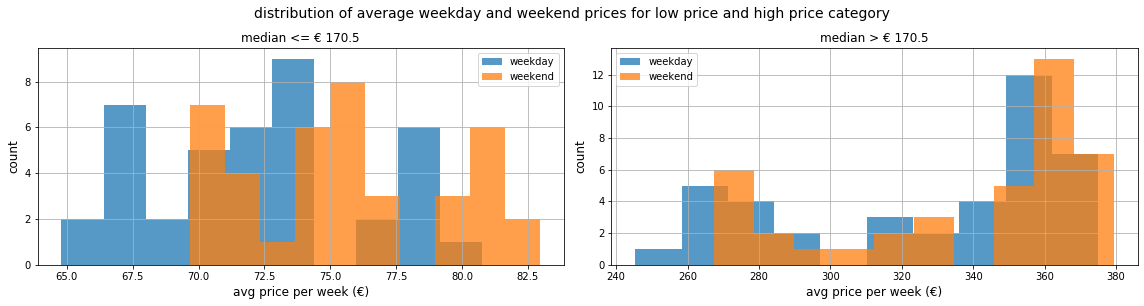

In [64]:
### print histogram comparing mean weekday and mean weekend prices per week of all available listings. 
### Left chart for low and right chart for high price category
fig, ax = plt.subplots(1, 2, figsize=(16, 4))
    
low_price_weekday.hist(ax=ax[0], histtype = 'bar', alpha = 0.75, grid = True, label = 'weekday')
low_price_weekend.hist(ax=ax[0], histtype = 'bar', alpha = 0.75, grid = True, label = 'weekend')
ax[0].set_title(price_category[0])
ax[0].set_ylabel('count')
ax[0].set_xlabel('avg price per week (€)')
ax[0].legend()

high_price_weekday.hist(ax=ax[1], histtype = 'bar', alpha = 0.75, grid = True, label = 'weekday')
high_price_weekend.hist(ax=ax[1], histtype = 'bar', alpha = 0.75, grid = True, label = 'weekend')
ax[1].set_title(price_category[1])
ax[1].set_ylabel('count')
ax[1].set_xlabel('avg price per week (€)')
ax[1].legend()

fig.suptitle('distribution of average weekday and weekend prices for low price and high price category', y = 1.05)
fig.tight_layout()

In [65]:
### print results of comparison between mean weekday and weekend listing prices for all available low price listings 
print('low price listings - comparison between weekday and weekend listing prices for all available listings:\n')
display(compare_group_means(low_price_weekday, low_price_weekend, alpha = 0.05))

low price listings - comparison between weekday and weekend listing prices for all available listings:

sample statistics:


count     40.000000
mean      72.094535
median    72.115402
std        4.272206
Name: weekday_price_avg, dtype: float64

count     40.000000
mean      75.629380
median    75.716771
std        3.973988
Name: weekend_price_avg, dtype: float64

mean difference between groups: -3.5348(4.90%)

group variances equal: W = 0.1802, p = 6.72e-01
Independent t-test:
statistic = -3.8316 | p-value = 2.56e-04 =>> mean difference between groups is statistically significant.


None

In [66]:
### print results of comparison between mean weekday and weekend listing prices for all available high price listings
print('high price listings - comparison between weekday and weekend listing prices for all available listings:\n')
display(compare_group_means(high_price_weekday, high_price_weekend, alpha = 0.05))

high price listings - comparison between weekday and weekend listing prices for all available listings:

sample statistics:


count      40.000000
mean      327.466185
median    346.526750
std        39.748228
Name: weekday_price_avg, dtype: float64

count      40.000000
mean      338.059156
median    355.469673
std        36.717525
Name: weekend_price_avg, dtype: float64

mean difference between groups: -10.5930(3.23%)

group variances equal: W = 0.2205, p = 6.40e-01
sample distribution not normal
Kruskal-Wallis H-test:
statistic = 3.5934 | p-value = 5.80e-02 =>> mean difference between groups is not statistically significant.


None

<p><b>Model Results and Evaluation</b>
<p>The mean difference for low price listings is 4.9 % while for high price listings it is only 3.2 %. The t-tests with alpha = 0.05 states that the mean difference for the low price category ist statistically significant while the mean difference for the high price category is not statistically significant.
<p>Thus we can conclude that for low price category listings weekday prices differ (statistically) significant from weekend prices. For high price category we cannot see a significant difference between weekday and weekend prices.

## Deployment <a class='anchor' id='deployment'></a>

<p><b>Conclusions</b>

<p>In this analysis the CRISP-DM process was followed as follows:
<ol>
    <li><b>Business Understanding: </b>transform broad business questions into a set of narrow and specific questions for which analysis can be tailored</li>
    <li><b>Data Understanding: </b>find and load data relevant to intended analysis. Then explore loaded data</li>
    <li><b>Data Preparation: </b>clean missing or unusable values. Engineering features useful for analysis</li>
    <li><b>Modeling: </b>perform exploratory analysis aimed to answer business questions</li>
    <li><b>Evaluation: </b>evaluate statistical significance of obtained results</li>
    <li><b>Deployment: </b>generate Jupyter Notebook file with reproducible analysis, related documentation, and references</li>
</ol>

<p><b>Results of analysis</b>
<p>Where can we find the most listings in Vienna?
<ul>
    <li>The 5 districts with the most Airbnb appartments can be found in following districts: Leopoldstadt (10.7 %), Landstraße (9.6 %), Innere Stadt (7.1 %), Rudolfsheim-Fünfhaus (6.5 %) and Alsergrund (6.2 %)</li>
</ul>
<p>Which type and size have the listings?
<ul>
    <li>The most numerous property type is by far the Apartment (85.5 %), then the Serviced apartment (4.2 %) and the Condominium (3.8 %)</li>
    <li>The most numerous room type is by far the Entire home / apt (80.1 %), then the Private room (17.3 %) and the Hotel room (1.9 %)</li>
    <li>The most numerous bed type is by far the Real bed (98.9 %), then the Pull-out-Sofa (0.8 %). Couch, Futon and Airbed have each less than 0.15 %</li>
    <li>The most frequent capacity are 2 accommodates (32.9 %), then 4 (30.0 %) and 3 (11.9 %). There are totally 23 appartments available with a maximum capacity of 16 accommodates</li>
    <li>The most frequent number of bathrooms per appartment is 1 (72.9 %), then 1.5 (19.9 %) and 2 (3.7 %)</li>
    <li>The most frequent number of bedrooms per appartment is 1 (61.6 %), then 2 (20.2 %) and 0 (11.6 %). There is 1 appartment available with totally 18 bedrooms</li>
    <li>The most frequent number of beds per appartment is 1 (41.2 %), then 2 (32.3 %) and 3 (12.4 %). There is 1 appartment available with totally 30 beds</li>
</ul>
<p>Which are the cheapest and the most expensive districts in Vienna?
<ul>
    <li>For tourists the most expensive districts according median price per appartment can be found in Innere Stadt (110.05 €), Wieden (76.08 €) and Marihilf (75.14 €) while the cheapest districts can be found in Floridsdorf (50.93 €), Penzing (52.62 €) and Ottakring (53.10 €)</li>
    <li>For the elevated price segment the most expensive districts according median price per appartment can be found in Favoriten (627.25 €), Alsergrund (303.84 €) and Heitzing (280.63 €) while the cheapest districts can be found in Simmering (191.97 €), Floridsdorf (195.00 €) and Liesing (198.85 €)</li>
    <li>It is surprising that Favoriten has the highest median price per neighborhood. This is not really an atractive neighbourhood for living</li>
</ul>

<p>When is the most suitable time to rent an Airbnb appartment in terms of price and availability?
<ul>
    <li>In terms of Availability the most suitable time to rent an Airbnb appartment in Vienna in January and February. Then we have availability rate of 0.7 for low price category and to 0.8 for high price category. The most unfavorable time would be November and December with periodic availability rates between 0.1 and 0.5 for low price and between 0.2 and 0.6 for high price category</li>
    <li>In terms of Price the most suitable time to rent an Airbnb appartment in Vienna is January and February when prices for low price category are 5 to 10 % and for high price category up to 20 % lower than the mean of the year. The most unfavorable time would be between Christmas and Nex Year when prices for low price category are 80 % and for high price category up to 60 % higher than the mean of the year</li>
    <li>Best time for renting Airbnb appartment is January and February. Around Christmas it is nice to visit Vienna but it is more difficult to find a free and cheap appartments</li>
</ul>
<p>Is there a significant price difference between weekdays and weekends? 
<ul>
    <li>For low price category listings weekday prices differ (statistically) significant from weekend prices. For high price category we cannot see a significant difference between weekday and weekend prices.</li>
</ul>

## References <a class='anchor' id='references'></a>

<ul style="list-style-type:none">
    <li>[1] Business model Toolbox <a href="url">https://bmtoolbox.net/stories/airbnb/</a></li>
    <li>[2] Inside Airbnb: <a href="url">http://insideairbnb.com/</a></li>
    <li>[3] Vienna listings.csv.gz: 
        <a href="url">http://data.insideairbnb.com/austria/vienna/vienna/2019-11-19/data/listings.csv.gz</a></li>
    <li>[4] Vienna calendar.csv.gz: 
        <a href="url">http://data.insideairbnb.com/austria/vienna/vienna/2019-11-19/data/calendar.csv.gz</a></li>
    <li>[5] Vienna neighbourhoods.geojson: 
        <a href="url">http://data.insideairbnb.com/austria/vienna/vienna/2019-11-19/data/neighbourhoods.geojson</a></li>
    <li>[6] Outlier identification: <a href="url">https://en.wikipedia.org/wiki/Outlier</a></li>
    <li>[7] t-test: <a href="url">https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html</a></li>
    <li>[8] Kruskal-Wallis H-test: <a href="url">https://docs.scipy.org/doc/scipy-0.19.1/reference/generated/scipy.stats.kruskal.html</a></li>
    <li>[9] Welch's t-test: <a href="url">https://en.wikipedia.org/wiki/Welch%27s_t-test</a></li>
    <li>[10] Code for legend of base map: <a href="url">https://tilemill-project.github.io/tilemill/docs/guides/advanced-legends/</a></li>
</ul>

In [ ]:
### download notebook to html
!jupyter nbconvert --to html airbnb_analysis.ipynb